In [39]:
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
import random as random
import math

In [40]:
def deleteOneRepositoryMember(rep , gamma):
    gridindices = [item.gridIndex for item in rep]
    OCells = np.unique(gridindices) # ocupied cells
    N = np.zeros(len(OCells))
    for k in range(len(OCells)):
        N[k] = gridindices.count(OCells[k])
    # selection probablity
    p = [math.exp(gamma*item) for item in N]
    p = np.array(p)/sum(p)

    # select cell index
    sci = roulettewheelSelection(p)
    SelectedCell = OCells[sci]

    #selected Cell members
    selectedCellmembers = [item for item in gridindices if item == SelectedCell]

    selectedmemberindex = np.random.randint(0,len(selectedCellmembers))
    #selectedmember = selectedCellmembers[selectedmemberindex]

    # delete memeber
    #rep[selectedmemberindex] = []
    rep = np.delete(rep, selectedmemberindex)

    return rep.tolist()


In [41]:
def SelectLeader(rep , beta):
    gridindices = [item.gridIndex for item in rep]
    OCells = np.unique(gridindices) # ocupied cells
    N = np.zeros(len(OCells))
    for k in range(len(OCells)):
        N[k] = gridindices.count(OCells[k])
    # selection probablity
    p = [math.exp(-beta*item) for item in N]
    p = np.array(p)/sum(p)

    # select cell index
    sci = roulettewheelSelection(p)
    SelectedCell = OCells[sci]

    #selected Cell members
    selectedCellmembers = [item for item in gridindices if item == SelectedCell]

    selectedmemberindex = np.random.randint(0,len(selectedCellmembers))
    # selectedmember = selectedCellmembers[selectedmemberindex]

    return rep[selectedmemberindex]

In [42]:
def roulettewheelSelection(p):
    r = random.random()
    cumsum = np.cumsum(p)
    y = (cumsum<r)
    x= [i for i in y if i==True]
    return len(x)

def FindGridIndex(particle, grid):
    nObj = len(particle.cost)
    NGrid = len(grid[0].LowerBounds)
    
    particle.gridSubIndex = np.zeros((1,nObj))[0]
    for j in range(nObj):  
        index_in_Dim = len( [item for item in grid[j].UpperBounds if particle.cost[j]>item]) 
        particle.gridSubIndex[j] = index_in_Dim

    particle.gridIndex = particle.gridSubIndex[0]

    for j in range(1,nObj):
        particle.gridIndex = particle.gridIndex 
        particle.gridIndex = NGrid*particle.gridIndex
        particle.gridIndex = particle.gridIndex + particle.gridSubIndex[j]

    return particle


In [43]:
def CreateGrid(pop,nGrid,alpha,nobj):
    costs = [item.cost for item in pop]
    Cmin = np.min(costs,axis=0)
    Cmax = np.max(costs,axis=0)
    deltaC = Cmax - Cmin
    Cmin =  Cmin - alpha*deltaC
    Cmax = Cmax + alpha*deltaC
   
    grid = [GridDim() for p in range(nobj)]
    for i in range(nobj):
       dimValues = np.linspace(Cmin[i],Cmax[i],nGrid+1).tolist()
       grid[i].LowerBounds = [-float('inf')] + dimValues
       grid[i].UpperBounds = dimValues  + [float('inf')]
    return grid

In [44]:
def Dominates(x,y):
    x=np.array(x)
    y=np.array(y)
    x_dominate_y = all(x<=y) and any(x<y)
    return x_dominate_y

def DetermineDomination(pop):
    pop_len= len(pop)
    for i in range(pop_len):
         pop[i].IsDominated = False 

    for i in range(pop_len-1):
        for j in range(i+1,pop_len):
            if Dominates(pop[i].cost,pop[j].cost):
                pop[j].IsDominated = True
            if Dominates(pop[j].cost,pop[i].cost):
                pop[i].IsDominated = True

    return pop

In [45]:
import pandas as pd
import numpy as np
import random
def uniform(low, up, size=None):
  return random.sample(range(varMin,varMax),nVar)
import autograd.numpy as anp 
def MOCPParticle(nVar): #passing VARS=init pop and NDIM=number of decision variables into the funct.
        #print(type(VARS))
        #if isinstance(nVar,np.ndarray):
           # nVar = nVar.tolist()
        #if type(nVar) is numpy.ndarray:
        if not isinstance(nVar, list):
            nVar = nVar.tolist()
            nVar = [int(x) for x in nVar]
       
       
        #nVar = list(nVar)
        #if isinstance(nVar,np.ndarray):
         #   nVar = type(nVar)
          #  return 0
                
        #print("Details of X below")

        #VARS.apply(pd.to_numeric)
        #VARS.astype('int32').dtypes
        #df = VARS.convert_objects(convert_numeric=True)
        dataset = pd.read_csv('DistanceMatrixnan2.csv',index_col=0)
        global x
        #x = pd.DataFrame(nVar)
        
        li = []
        cont_distance =[]
        cont_distanc =[]
        ctyu = []
        sam = 0
        a = 0
        sm = []
        city = dataset.columns.to_list()
        #print("city is \n", city)
        v = len(dataset)
        #print("length of dataset is ", v)
        minL = []
        sumL = []
        maxC2C = []
        avgC2C = []
        C2C = []
        end_values = []
        
        r = nVar
        print (r)
        for i in range(len(r)):
            ctyu.append(city[r[i]])
          #print('city being appended is ',city[r[i]])

        
          #print('selected', city[r[i]]  )
        a = i
        dty = dataset[ctyu].iloc[0]

          #print('tobi is ',dty)
        cont_distance = max(dty)
          
        ydt = dataset[ctyu]
        lo = ydt.iloc[0]
        #print(lo)
        for i in range(len(lo)):
            si = 0
            a = i
              
            for j in range(i +1,len(lo), 1):
                si = lo[i] + lo[j]
                sm.append(si)
            t = 0
            for u in sm:
              t = t + u
            #print(t)
            C2 = (t)/(math.comb(len(r), 2))
            print(C2)
        new_dataset = ydt.dropna() 
        
        row_list = []
        new_list =[]
        ij = []
        values = pd.DataFrame()
        for index, row in ydt.iterrows():
            #print('index is length ',len(row))
            for k in range(len(row)):
              
              if isinstance(row.loc[ctyu[k]], pd.core.series.Series):
                
                row_list.append(row.loc[ctyu[k]].iloc[0])
              else:
                row_list.append(row.loc[ctyu[k]])
            #print("row_list\n", row_list)
            for i in row_list:
              if i != min(row_list):
                    #print("I is not equal to min of rowlist")
                    new_list.append(0)
              else:
                    new_list.append(1)
              #print("New list is \n",new_list)
            to_load = pd.Series(new_list, index=ctyu)
            #print("loaded list is \n", to_load)
            values = values.append(to_load, ignore_index=True)
            #print("values \n", values)
            row_list =[]
            new_list =[]

            result = values.apply(pd.value_counts).drop([0])
            #print("result\n", result,"\nMAX", result.max(axis = 1), "\nMIN", result.min(axis = 1))
            end_val = (result.max(axis = 1) - result.min(axis = 1))/result.max(axis = 1)
            
            #print("end_val\n",end_val)
            end_values.append(end_val)

            
            
            
            C2C.append(C2)
            maxC2C.append(cont_distance)
            avgC2C.append(C2)

            for i in r:
              li.append(city[i])
            #print("A new row ") 
            #print(li)
            new_dataset2 = dataset[li]  
            new_dataset2 = new_dataset2.dropna() 
            new_dataset2 = new_dataset2.reset_index(drop=True)
            new_dataset2 =  pd.DataFrame(new_dataset2)
            mins =  new_dataset2.min(axis=1)
            sum1 = 1/(abs(len(new_dataset2))) * np.sum(mins)
            #print(new_dataset2)
            minL.append(mins)
            sumL.append(sum1)
        minDataset = pd.DataFrame(minL)
        maxC2CDataset = pd.DataFrame(maxC2C)
        C2CDataset = pd.DataFrame(C2C)
        EndValDataset = pd.DataFrame(end_values)
        avgC2CDataset = pd.DataFrame(avgC2C)
        
        #norm_EndValDataset = EndValDataset / (EndValDataset.max())
        #print('EndValDataset.max() is \n', EndValDataset.max())
        #print('EndValDataset is \n',norm_EndValDataset)
        #return norm_EndValDataset
        #endvalues_norm = norm_EndValDataset[1.0].to_list()
        
        maxNu = minDataset.max(axis=1) #generates the maximum of minimum
        maxIjogbon = maxNu.values.tolist()
        end_valmod = end_val.values.tolist()
        #print("Maximum of Minimum is ")
        #print(maxNu)
        #print("\n\n")
        #print("Sum")
        maxNuDataset = pd.DataFrame(maxNu)
        sumDataset = pd.DataFrame(sumL) #generates the sum
        
        print("maxIjogbon", maxIjogbon[0])
        print("cont_distance",  cont_distance)
        print("C2", C2 )
        print("end_valmod", end_valmod[0])
        print("sum", sum1)
        
        return numpy.array([maxIjogbon[0], cont_distance, C2, end_valmod[0],  sum1])

In [46]:
#CUSTOM INITIAL PARAMETER TOBESKY
nVar = 5 # number of decision vars
varMin = 0
varMax = 20
maxIt = 60
# nPop = 500
nPop = 200
nRep = 100  # size of repository
w = 0.9 # inertia wieght
c1 = 15 # personal learning coefficient
c2 = 15 # global learning coefficient
wdamping = 0.99

In [47]:
D_lower = varMin
D_upper = varMax
NDIM = nVar
def uniform(low, up, size=None):
    return random.sample(range(D_lower,D_upper), NDIM)
uniform(D_lower,D_upper, NDIM)

[5, 0, 19, 7, 17]

In [48]:
import numpy as np
import numpy
import math
beta = 1 # leader selection pressure
gamma = 1 # deletion selection pressure
NoGrid = 5
alpha=0.1 # nerkhe tavarrom grid

# initialization
class Particle:
    position = []
    cost = []
    velocity = []
    best_position = []
    best_cost = []
    IsDominated = []
    gridIndex = []
    gridSubIndex = []

# for each objective a grid items is division of values of objective cost
class GridDim: 
    LowerBounds = []
    UpperBounds = []

global Particles
#Particles = np.matlib.repmat(Particle,nPop,1)
Particles = [Particle() for p in range(nPop)]
Temp_Particles = []
#print (Particles)

for i in range(nPop):
    Temp_Position = np.array(uniform(varMin,varMax,nVar))
    Particles[i].position = Temp_Position
    Temp_Particles.append(Temp_Position)
    #print('position is', Particles[i].position)
    Particles[i].velocity = np.zeros(nVar)
    Particles[i].cost = np.array(MOCPParticle(Particles[i].position))
    # update best personal Best
    Particles[i].best_position = Particles[i].position
    Particles[i].best_cost = Particles[i].cost
    Particles[i].IsDominated = False 

#print (Particles)
#Particles.cost = MOCP(Temp_Particles, NDIM)   
    
Particles = DetermineDomination(Particles)

Repos = [item for item in Particles if item.IsDominated == False ]
#print("Repos\n\n")
#print (Repos[0].cost)
#print (Repos[1].cost)
nObj =len( Repos[0].cost)
grid = CreateGrid(Repos,NoGrid,alpha=0.1,nobj=nObj)

for r in range(len(Repos)):
    Repos[r] = FindGridIndex(Repos[0],grid)
    #print("r is", r)
    #print ("repos r is", r)


[5, 10, 14, 19, 15]
0.3175215147
0.646411874
0.8422195257
0.9397088988
0.9397088988
maxIjogbon 0.370983531
cont_distance 0.607472823
C2 0.9397088988
end_valmod 0.8
sum 0.12937182714285714
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
[4, 11, 17, 8, 1]
0.2837621418
0.568703687
0.6910372011000001
0.7367802780000001
0.7367802780000001
maxIjogbon 0.509767536
cont_distance 0.669677499
C2 0.7367802780000001
end_valmod 0.7142857142857143
sum 0.14413675904761905
[6, 13, 9, 18, 16]
0.295335537
0.5523517247999999
0.7571594103999999
0.8603218163999999
0.8603218163999999
maxIjogbon 0.299491969
cont_distance 0.642858658
C2 0.8603218163999999
end_valmod 0.7142857142857143
sum 0.10659783609523807
[17, 3, 1, 10, 5]
0.2677771976
0.396903192
0.5232874549000001
0.6115661672000001
0.6115661672000001
maxIjogbon 0.488235886
cont_distance 0.607472823
C2 0.6115661

maxIjogbon 0.488235886
cont_distance 0.508226398
C2 0.646118956
end_valmod 0.6666666666666666
sum 0.12678516233333334
[13, 15, 0, 1, 18]
0.2510660251
0.4762809014
0.5342102168999999
0.5921395324
0.5921395324
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.5921395324
end_valmod 0.6666666666666666
sum 0.11180304661904764
[1, 17, 13, 5, 16]
0.2406673296
0.48171399519999997
0.642218719
0.7340360148
0.7340360148
maxIjogbon 0.446606371
cont_distance 0.642858658
C2 0.7340360148
end_valmod 0.8571428571428571
sum 0.1194052734761905
[6, 16, 14, 4, 1]
0.27269358169999997
0.5669521178
0.7175121958
0.7697539952
0.7697539952
maxIjogbon 0.509767536
cont_distance 0.642858658
C2 0.7697539952
end_valmod 0.75
sum 0.14605315542857145
[13, 11, 19, 9, 18]
0.3357693054
0.6680992545999999
0.8412534735999998
0.9309526535999998
0.9309526535999998
maxIjogbon 0.34343714
cont_distance 0.669677499
C2 0.9309526535999998
end_valmod 0.9090909090909091
sum 0.14950168952380952
[8, 18, 12, 10, 15]
0.311667055300000

cont_distance 0.417275195
C2 0.6745983056000001
end_valmod 0.875
sum 0.1361028658095238
[14, 0, 4, 11, 12]
0.346313504
0.4959904507999999
0.6788564216999999
0.7953443443999999
0.7953443443999999
maxIjogbon 0.268416266
cont_distance 0.669677499
C2 0.7953443443999999
end_valmod 0.75
sum 0.10513903109523808
[4, 3, 15, 8, 17]
0.2607683058
0.4033101864
0.5798194138
0.644804934
0.644804934
maxIjogbon 0.488235886
cont_distance 0.557618536
C2 0.644804934
end_valmod 0.4
sum 0.1343650464761905
[5, 8, 9, 7, 1]
0.2489009318
0.4410567468
0.6039642968
0.6652265672
0.6652265672
maxIjogbon 0.513567909
cont_distance 0.508226398
C2 0.6652265672
end_valmod 0.7142857142857143
sum 0.14840694995238096
[5, 18, 1, 6, 10]
0.2555540121
0.47873538460000004
0.6043399118
0.6918388884000001
0.6918388884000001
maxIjogbon 0.509327753
cont_distance 0.607472823
C2 0.6918388884000001
end_valmod 0.75
sum 0.14750869757142857
[11, 13, 10, 19, 15]
0.460451369
0.7217191664
0.9407031041
1.0381924772
1.0381924772
maxIjogbon 0.

C2 1.0582516844
end_valmod 0.9166666666666666
sum 0.1659804344285714
[7, 16, 13, 12, 10]
0.37773501530000003
0.7152037818000001
0.8941586649000002
1.0044261200000002
1.0044261200000002
maxIjogbon 0.357032701
cont_distance 0.642858658
C2 1.0044261200000002
end_valmod 0.9090909090909091
sum 0.1459834665238095
[19, 2, 11, 8, 9]
0.3264594782
0.5161462962
0.7275947374
0.8051076788
0.8051076788
maxIjogbon 0.421022636
cont_distance 0.669677499
C2 0.8051076788
end_valmod 0.8571428571428571
sum 0.16241426471428572
[3, 9, 16, 4, 17]
0.2156520907
0.5038901186
0.7039460929000001
0.7754303356000001
0.7754303356000001
maxIjogbon 0.488235886
cont_distance 0.642858658
C2 0.7754303356000001
end_valmod 0.6666666666666666
sum 0.12913067885714286
[5, 7, 6, 12, 13]
0.26295079620000006
0.5001948626
0.6375621380000001
0.7214260248000001
0.7214260248000001
maxIjogbon 0.357032701
cont_distance 0.495201728
C2 0.7214260248000001
end_valmod 0.75
sum 0.12539557371428572
[9, 7, 16, 11, 4]
0.4099426941
0.70101381919

[13, 0, 8, 15, 17]
0.2581222298
0.3788696036
0.5263072790000001
0.6203643512000001
0.6203643512000001
maxIjogbon 0.403059166
cont_distance 0.557618536
C2 0.6203643512000001
end_valmod 0.4
sum 0.10412141642857144
[13, 2, 15, 1, 14]
0.2764173331
0.4455972279999999
0.6253328497999999
0.6935447643999999
0.6935447643999999
maxIjogbon 0.428657641
cont_distance 0.557618536
C2 0.6935447643999999
end_valmod 0.5
sum 0.12264989914285715
[3, 16, 13, 19, 9]
0.2202390815
0.5399905521999999
0.7012281394999998
0.7937782987999998
0.7937782987999998
maxIjogbon 0.268416266
cont_distance 0.642858658
C2 0.7937782987999998
end_valmod 0.7142857142857143
sum 0.13298452333333333
[19, 1, 9, 18, 12]
0.32518220610000004
0.5215598848
0.7116018774000001
0.7999985904000002
0.7999985904000002
maxIjogbon 0.256454083
cont_distance 0.508226398
C2 0.7999985904000002
end_valmod 0.75
sum 0.10365228247619046
[19, 9, 18, 12, 16]
0.37041529659999994
0.6755657948
0.8671249138
0.9809309524
0.9809309524
maxIjogbon 0.388765402
co

[3, 13, 10, 4, 11]
0.22430711269999998
0.48824231099999993
0.7098936495999999
0.8100504235999999
0.8100504235999999
maxIjogbon 0.299491969
cont_distance 0.669677499
C2 0.8100504235999999
end_valmod 0.6666666666666666
sum 0.09732119857142858
[14, 13, 19, 11, 3]
0.34694037619999996
0.5659316231999999
0.7236192477
0.7978518332
0.7978518332
maxIjogbon 0.268416266
cont_distance 0.669677499
C2 0.7978518332
end_valmod 0.875
sum 0.11118384723809523
[5, 11, 9, 15, 8]
0.3103682649
0.6445463096
0.8286437444000001
0.9110958996
0.9110958996
maxIjogbon 0.513567909
cont_distance 0.669677499
C2 0.9110958996
end_valmod 0.9166666666666666
sum 0.13961125200000002
[5, 15, 1, 12, 17]
0.2727557403
0.5469094678
0.6728304098000001
0.7606458012000001
0.7606458012000001
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.7606458012000001
end_valmod 0.7142857142857143
sum 0.11904604085714285
[8, 18, 10, 6, 17]
0.2714319418
0.5138557576
0.7003972351000001
0.765444148
0.765444148
maxIjogbon 0.509327753
cont_dist

In [49]:
def fixer(VA):
    VA = [int(x) for x in VA]
    for i in range(len(VA)):
      if VA[i] < 0:
        VA[i] = 0
      elif VA[i] > 20:
        VA[i] = 20
      
      
    k = []
    for i in range(len(VA)):
        VA[i] = int(round(VA[i]))
        if VA[i] not in k:
            k.append(VA[i])
        else:
            f = 0
            for q in range(VA[i], 20):
                if q not in k:
                    VA[i] = q
                    k.append(q)
                    f = 1
                    break
            if f == 0:
                for q in reversed(range(0, VA[i])):
                    if q not in k:
                        VA[i] = q
                        k.append(q)
                        f = 1
                        break
    return VA

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 5 10 14 19 15] type <class 'numpy.ndarray'>
[5, 0, 1, 2, 3]
0.1515120398
0.1928983596
0.2533374547
0.27567099920000004
0.27567099920000004
maxIjogbon 0.490670485
cont_distance 0.2753143
C2 0.27567099920000004
end_valmod 0.9
sum 0.19113757571428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 5  0  4 14  8] type <class 'numpy.ndarray'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 4 11 17  8  1] type <class 'numpy.ndarray'>
[17, 0, 1, 20, 19]
0.2586558727
0.36413087099999997
0.4886586445999999
0.5750808675999999
0.5750808675999999
maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.5750808675999999
end_valmod 0.7777777777777778
sum 0

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [11  1 19 14  3] type <class 'numpy.ndarray'>
[0, 1, 2, 14, 20]
0.127975327
0.2940562046
0.4180474652
0.511901308
0.511901308
maxIjogbon 0.428657641
cont_distance 0.491591393
C2 0.511901308
end_valmod 0.8888888888888888
sum 0.1178515030952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 8  0 16  5  3] type <class 'numpy.ndarray'>
[2, 0, 7, 20, 19]
0.1889065537
0.3175382718
0.488379485
0.5748017080000001
0.5748017080000001
maxIjogbon 0.357032701
cont_distance 0.446947035
C2 0.5748017080000001
end_valmod 0.8333333333333334
sum 0.1269941004761905
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 7  8 14 18 17] type <class 'numpy.ndarray'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999

maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.4707709116
end_valmod 0.8888888888888888
sum 0.13143750461904763
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 1 10  0 13  9] type <class 'numpy.ndarray'>
[20, 0, 12, 19, 4]
0.3032155304
0.42765224679999997
0.6016091359999999
0.6765256795999999
0.6765256795999999
maxIjogbon 0.490886818
cont_distance 0.495201728
C2 0.6765256795999999
end_valmod 0.9285714285714286
sum 0.14461904595238095
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [19 10 16  4 13] type <class 'numpy.ndarray'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 0 18 14  6 17] type <class 'numpy.ndarray'>
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.

[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [19  5 18 11  0] type <class 'numpy.ndarray'>
[1, 0, 2, 20, 19]
0.1777020331
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 6 13 17 11  1] type <class 'numpy.ndarray'>
[3, 0, 1, 20, 19]
0.13453434069999998
0.240009339
0.3645371126
0.4509593356
0.4509593356
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4509593356
end_valmod 0.9230769230769231
sum 0.1819489277142857
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [11 19 15  7 12] type <class 'numpy.ndarray'>
[0, 1, 

maxIjogbon 0.357032701
cont_distance 0.446947035
C2 0.5308346728
end_valmod 0.8
sum 0.12174168238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [19  1 15 12  3] type <class 'numpy.ndarray'>
[0, 1, 2, 15, 20]
0.1345780413
0.3072616332
0.4378556081
0.5383121652
0.5383121652
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.5383121652
end_valmod 0.875
sum 0.1220818430952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [13 17  0 10 15] type <class 'numpy.ndarray'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 8  9 14 11  1] type <class 'numpy.ndarray'>
[0, 1, 2, 15, 20]
0.1345780413
0.3072616332
0.4378556081
0.5383121652
0.5383121652
ma

maxIjogbon 0.357032701
cont_distance 0.446947035
C2 0.452887238
end_valmod 0.9
sum 0.1235449322857143
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [16 10  6 12 18] type <class 'numpy.ndarray'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [16  1  3  0  7] type <class 'numpy.ndarray'>
[0, 1, 6, 20, 8]
0.1171894747
0.2724845
0.3973728937
0.4687578988
0.4687578988
maxIjogbon 0.420679736
cont_distance 0.446947035
C2 0.4687578988
end_valmod 0.7777777777777778
sum 0.1636380597142857
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 5  8  1 10  0] type <class 'numpy.ndarray'>
[5, 0, 20, 19, 18]
0.2354244832
0.3607232464
0.5307167131
0.6113207728
0.6113207728
maxIjogbon 0.490

[18, 0, 1, 12, 20]
0.2687738124
0.382041464
0.5143618909000001
0.6085767672000001
0.6085767672000001
maxIjogbon 0.502584073
cont_distance 0.495201728
C2 0.6085767672000001
end_valmod 0.8888888888888888
sum 0.1298882396190476
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 0  1 12  5 16] type <class 'numpy.ndarray'>
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 4  0  6 13  9] type <class 'numpy.ndarray'>
[16, 0, 1, 20, 6]
0.3476426363
0.4381418094000001
0.5476937578000001
0.6191401556
0.6191401556
maxIjogbon 0.423034124
cont_distance 0.642858658
C2 0.6191401556
end_valmod 0.75
sum 0.12259242071428571
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [15  5  8 13  2] type <cl

maxIjogbon 0.495201728
cont_distance 0.642858658
C2 0.5728718671999999
end_valmod 0.75
sum 0.1410831742857143
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [10  9 14  5  2] type <class 'numpy.ndarray'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [19 13  3  5  6] type <class 'numpy.ndarray'>
[0, 1, 4, 20, 14]
0.1460956422
0.33029683499999996
0.49052872599999997
0.5843825688
0.5843825688
maxIjogbon 0.428657641
cont_distance 0.491591393
C2 0.5843825688
end_valmod 0.6666666666666666
sum 0.107790368
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [11 12 15  4 17] type <class 'numpy.ndarray'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.344324093

[2, 0, 1, 20, 3]
0.13128715
0.20229946440000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809


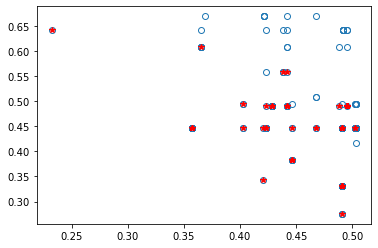

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 2, 3] type <class 'list'>
[5, 0, 1, 20, 2]
0.18894190770000002
0.26775809539999995
0.3656270584
0.4253904707999999
0.4253904707999999
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.4253904707999999
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 4 11 17  8  1] type <class 'numpy.ndarray'>
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Pa

maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 14, 20] type <class 'list'>
[0, 1, 2, 14, 3]
0.09054545909999999
0.21919646879999996
0.30575786149999995
0.36218183639999996
0.36218183639999996
maxIjogbon 0.44158265
cont_distance 0.491591393
C2 0.36218183639999996
end_valmod 0.8888888888888888
sum 0.15535738171428573
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [2, 0, 7, 20, 19] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.5774061

[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 0 18 14  6 17] type <class 'numpy.ndarray'>
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.6543759271999999
end_valmod 0.8181818181818182
sum 0.13646337633333333
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 6] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>


[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 6 17 13  5 19] type <class 'numpy.ndarray'>
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 20, 2] type <class 'list'>
[19, 0, 4, 1, 20]
0.2638465809
0.3607830838
0.4909086107999999
0.5546560895999999
0.5546560895999999
maxIjogbon 0.490886818
cont_distance 0.446947035
C2 0.5546560895999999
end_valmod 0.8
sum 0.13087248385714284
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [6, 0, 1, 15, 12] type <class 'list'>
[0, 1,

[0, 1, 2, 11, 20]
0.1457839376
0.3296734258
0.4714732969999999
0.5831357504
0.5831357504
maxIjogbon 0.467361064
cont_distance 0.669677499
C2 0.5831357504
end_valmod 0.9090909090909091
sum 0.1592431088095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [18  3  8  0  7] type <class 'numpy.ndarray'>
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [2, 0, 1, 20, 3] type <class 'list'>
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1

maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.42539047080000003
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 20, 19, 6]
0.1322266926
0.3025589358
0.4604275566
0.5289067704
0.5289067704
maxIjogbon 0.423034124
cont_distance 0.446947035
C2 0.5289067704
end_valmod 0.8333333333333334
sum 0.15871207504761903
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 16, 1, 2] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[20, 0, 1, 17, 2]
0.2511955168
0.32361221960000003
0.4150816977000001
0.46844562520000005
0.46844562520000005
maxIjogbon 0.446

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [12  4 11 18  1] type <class 'numpy.ndarray'>
[1, 12, 0, 20, 2]
0.1854946864
0.3938186172
0.4535820296
0.513345442
0.513345442
maxIjogbon 0.503587055
cont_distance 0.495201728
C2 0.513345442
end_valmod 0.9285714285714286
sum 0.18830273995238092
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 9 18 17  4  0] type <class 'numpy.ndarray'>
[20, 19, 5, 0, 1]
0.2670905388
0.43885730259999994
0.5129729379
0.532025713199

maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.6543759272
end_valmod 0.8181818181818182
sum 0.13646337633333333
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 17, 3]
0.0796815384
0.19746862739999999
0.27316609940000003
0.3187261536
0.3187261536
maxIjogbon 0.446606371
cont_distance 0.382952186
C2 0.3187261536
end_valmod 0.8888888888888888
sum 0.1619095964761905
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[7, 0, 1, 2, 3]
0.2102243002
0.25161062
0.31204971509999996
0.3343832595999999
0.3343832595999999
maxIjogbon 0.44158265
cont_distance 0.422094951
C2 0.3343832595999999
end_valmod 0.9
sum 0.1604295057619048
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 20, 19, 1] type <class 'list'>
[5, 0, 1, 15, 20]
0.2296350524
0.34914438480000004
0.4877064925000001
0.5881630496000001
0.5881630

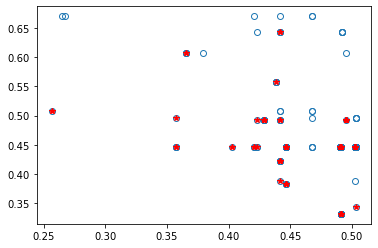

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 2, 3] type <class 'list'>
[5, 0, 1, 2, 17]
0.18254242280000002
0.2549591256
0.3464286037
0.3997925312
0.3997925312
maxIjogbon 0.446606371
cont_distance 0.382952186
C2 0.3997925312
end_valmod 0.8888888888888888
sum 0.1604507043809524
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 20, 19, 1, 2] type <class 'list'>
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x0

[20, 0, 1, 14, 16]
0.31127659439999994
0.4437743747999999
0.5953249304999999
0.7087699355999999
0.7087699355999999
maxIjogbon 0.428657641
cont_distance 0.642858658
C2 0.7087699355999999
end_valmod 0.7142857142857143
sum 0.11491294795238095
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [2, 0, 7, 20, 19] type <class 'list'>
[20, 0, 10, 19, 18]
0.320130156
0.46148149800000005
0.6635801223000001
0.744184182
0.744184182
maxIjogbon 0.379449102
cont_distance 0.607472823
C2 0.744184182
end_valmod 0.7142857142857143
sum 0.12275171933333333
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position

[0, 14, 1, 2, 16]
0.1475664893
0.3934512572
0.5109113825
0.5902659572000001
0.5902659572000001
maxIjogbon 0.44158265
cont_distance 0.642858658
C2 0.5902659572000001
end_valmod 0.7142857142857143
sum 0.15103449357142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 6] type <class 'list'>
[1, 0, 2, 20, 3]
0.14323934919999998
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 17, 3]
0.0796815384
0.19746862739999999
0.27316609940000003
0.3187261536
0.3187261536
maxIjogbon 0.446606371
cont_distance 0.382952186
C2 0.3187261536
end_valmod 0.8888888888888888
sum 0.1619095964761905
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 4, 1, 19] type <class 

end_valmod 0.9230769230769231
sum 0.1819489277142857
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 6 17 13  5 19] type <class 'numpy.ndarray'>
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 20, 2] type <class 'list'>
[0, 5, 4, 20, 1]
0.1244679329
0.3039987258
0.43412425280000005
0.4978717316000001
0.4978717316000001
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.4978717316000001
end_valmod 0.75
sum 0.13908207542857143
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 9, 12, 2] type <class 'list'>
[20, 0, 1, 19, 15]
0.29532096240000005
0.4118631108
0.5474580345
0.6449474075999999
0.6449474075999999
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.6

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 3] type <class 'list'>
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [18  3  8  0  7] type <class 'numpy.ndarray'>
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [2, 0, 1, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjog

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.45263960680000004
end_valmod 0.9090909090909091
sum 0.18006939376190476
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 5  8  1 10  0] type <class 'numpy.ndarray'>
[5, 0, 1, 20, 2]
0.18894190770000002
0.26775809539999995
0.3656270584
0.4253904707999999
0.4253904707999999
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.4253904707999999
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 2, 3, 6]
0.0681380141
0.1743815788
0.23853552649999998
0.2725520564
0.2725520564
maxIjogbon 0.44158265
cont_distance 0.267516943
C2 0.2725520564
end_valmod 0.9166666666666666
sum 0.20253574423809523
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.344324093

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 19, 1, 2] type <class 'list'>
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [1, 12, 0, 20, 2] type <class 'list'>
[20, 0, 6, 19, 1]
0.2663108031
0.3538427922
0.4681264756
0.5289067704
0.5289067704
maxIjogbon 0.423034124
cont_distance 0.446947035
C2 0.5289067704
end_valmod 0.8333333333333334
sum 0.15871207504761903
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[12, 0, 1, 20, 2]
0.27689687890000003
0.3557130666
0.4535820296
0.513345442
0.513345442
maxIjogbon 0.503587055
c

maxIjogbon 0.428657641
cont_distance 0.491591393
C2 0.6978316099999999
end_valmod 0.7142857142857143
sum 0.12542656885714287
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 19, 18, 0, 17] type <class 'list'>
[9, 0, 20, 19, 18]
0.3285893224
0.45388808559999994
0.6238815523
0.7044856119999999
0.7044856119999999
maxIjogbon 0.256454083
cont_distance 0.508226398
C2 0.7044856119999999
end_valmod 0.8
sum 0.11679683557142857
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [7, 0, 1, 2, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxI

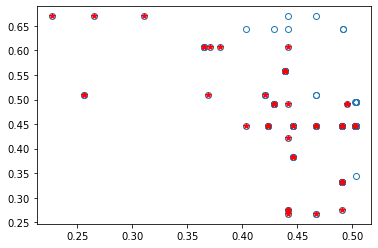

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 2, 17] type <class 'list'>
[5, 0, 1, 11, 8]
0.22283654679999998
0.3355473736
0.46731097569999996
0.5609690272
0.5609690272
maxIjogbon 0.495201728
cont_distance 0.669677499
C2 0.5609690272
end_valmod 0.8333333333333334
sum 0.1665802051904762
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 20, 1, 2, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader 

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 14, 3] type <class 'list'>
[0, 1, 2, 14, 3]
0.09054545909999999
0.21919646879999996
0.30575786149999995
0.36218183639999996
0.36218183639999996
maxIjogbon 0.44158265
cont_distance 0.491591393
C2 0.36218183639999996
end_valmod 0.8888888888888888
sum 0.15535738171428573
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 10, 19, 18] type <class 'list'>
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.34432

maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.42539047080000003
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 0 18 14  6 17] type <class 'numpy.ndarray'>
[0, 1, 20, 19, 10]
0.1662222806
0.3705501118
0.5624143206000001
0.6648891224
0.6648891224
maxIjogbon 0.365543138
cont_distance 0.607472823
C2 0.6648891224
end_valmod 0.7777777777777778
sum 0.1215597118095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 6] type <class 'list'>
[11, 0, 4, 1, 2]
0.3351815079
0.40249201619999997
0.5029915486000001
0.5371130328
0.5371130328
maxI

[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [11 19 15  7 12] type <class 'numpy.ndarray'>
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.6543759271999999
end_valmod 0.8181818181818182
sum 0.13646337633333333
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 6 17 13  5 19] type <class 'numpy.ndarray'>
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 5, 4, 20, 1] type <class 

[0, 1, 12, 2, 3]
0.09090649259999999
0.21991853579999993
0.3412924259
0.36362597039999994
0.36362597039999994
maxIjogbon 0.503587055
cont_distance 0.495201728
C2 0.36362597039999994
end_valmod 0.9285714285714286
sum 0.199396316047619
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 15, 20] type <class 'list'>
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 3] type <class 'list'>
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [18  3  8  0  7] type <class 'numpy.ndarray'

maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 5  8  1 10  0] type <class 'numpy.ndarray'>
[5, 0, 1, 2, 20]
0.18894190770000002
0.26775809539999995
0.3656270584
0.4253904707999999
0.4253904707999999
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.4253904707999999
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3

[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 6, 19, 1] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 10, 2, 3]
0.1021336021
0.24237275479999995
0.38620086389999997
0.4085344083999999
0.4085344083999999
maxIjogbon 0.44158265
cont_distance 0.607472823
C2 0.4085344083999999
end_valmod 0.875
sum 0.16538338099999997
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 9 18 17  4  0] type <class 'numpy

maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 15, 20] type <class 'list'>
[5, 0, 1, 20, 19]
0.2156007183
0.32107571659999995
0.4456034902
0.5320257132
0.5320257132
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.5320257132
end_valmod 0.8
sum 0.1473139065238095
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 12, 3] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.4469470

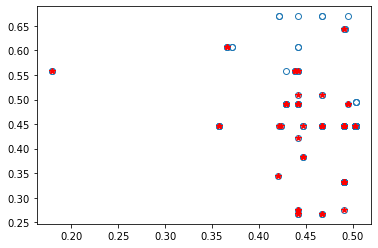

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 2, 17] type <class 'list'>
[5, 0, 2, 10, 20]
0.23063641470000001
0.3511471094
0.48672651299999997
0.5921684988
0.5921684988
maxIjogbon 0.370983531
cont_distance 0.607472823
C2 0.5921684988
end_valmod 0.75
sum 0.11643522766666665
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Par

maxIjogbon 0.44158265
cont_distance 0.491591393
C2 0.36218183639999996
end_valmod 0.8888888888888888
sum 0.15535738171428573
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 3] type <class 'list'>
[0, 1, 2, 3, 8]
0.0680766214
0.1742587934
0.2383513484
0.2723064856
0.2723064856
maxIjogbon 0.467361064
cont_distance 0.266903016
C2 0.2723064856
end_valmod 0.875
sum 0.21455977476190474
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 6]
0.0681380141
0.1743815788
0.23853552649999998
0.2725520564
0.2725520564
maxIjogbon 0.44158265
cont_distance 0.267516943
C2 0.2725520564
end_valmod 0.9166666666666666
sum 0.20253574423809523
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 15, 19, 1] type <class 'list'>
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_dis

maxIjogbon 0.44158265
cont_distance 0.388765402
C2 0.398753304
end_valmod 0.8
sum 0.15421220890476192
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 0 18 14  6 17] type <class 'numpy.ndarray'>
[10, 20, 0, 1, 2]
0.3218053169
0.49001091160000004
0.5241323957999999
0.55825388
0.55825388
maxIjogbon 0.365543138
cont_distance 0.607472823
C2 0.55825388
end_valmod 0.875
sum 0.12787750238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [11, 0, 4, 1, 2] type <class 'list'>
[0, 1, 5, 20, 2]
0.10634761770000001
0.250800786
0.3656270584
0.42539047080000003
0.42539047080000003
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.42539047080000003
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.49088681

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [11 19 15  7 12] type <class 'numpy.ndarray'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 20, 1, 19, 18] type <class 'list'>
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 20, 2] type <class 'list'>
[0, 1, 4, 20, 2]
0.1120052118
0.2621159742
0.38825743479999997
0.4480208472
0.4480208472
maxIjo

C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 19, 18] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 19, 0, 18, 1] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_

maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 13, 20, 2] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 5  8  1 10  0] type <class 'numpy.ndarray'>
[5, 0, 1, 2, 3]
0.1515120398
0.1928983596
0.2533374547
0.27567099920000004
0.27567099920000004
maxIjogbon 0.490670485
cont_distance 0.2753143
C2 0.27567099920000004
end_valmod 0.9
sum 0.19113757571428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584

maxIjogbon 0.446606371
cont_distance 0.642858658
C2 0.6653142528
end_valmod 0.6666666666666666
sum 0.10781830857142859
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 17, 3] type <class 'list'>
[0, 1, 2, 17, 3]
0.0796815384
0.19746862739999999
0.27316609940000003
0.3187261536
0.3187261536
maxIjogbon 0.446606371
cont_distance 0.382952186
C2 0.3187261536
end_valmod 0.8888888888888888
sum 0.1619095964761905
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 19, 2] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 4, 2, 3]
0.07457534390000001
0.1872562384
0.2759678311
0.29830137560000003
0.29830137560000003
max

maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.5160894476
end_valmod 0.8461538461538461
sum 0.15172761776190477
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [9, 0, 20, 19, 18] type <class 'list'>
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[20, 0, 19, 15, 18]
0.3151447273
0.4515106405999999
0.6296040733999999
0.7242424672
0.7242424672
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.7242424672
end_valmod 0.7142857142857143
sum 0.1239536057142857
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.482174

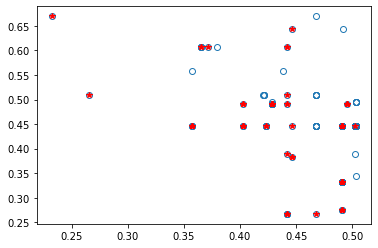

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 2, 17] type <class 'list'>
[5, 0, 13, 1, 2]
0.1785909182
0.24705611639999997
0.34986502859999996
0.38398651279999996
0.38398651279999996
maxIjogbon 0.490670485
cont_distance 0.34343714
C2 0.38398651279999996
end_valmod 0.9
sum 0.158777333
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[20, 0, 9, 19, 1]
0.2903817486
0.40198468319999997
0.5644102576
0.6251905524
0.6251905524
maxIjogbon 0.421022636
cont_distance 0.508226398
C2 0.6251905524
end_valmod 0.8181818181818182
sum 0.1513809151904762
leader <__main__.Particle o

maxIjogbon 0.44158265
cont_distance 0.491591393
C2 0.36218183639999996
end_valmod 0.8888888888888888
sum 0.15535738171428573
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 8] type <class 'list'>
[0, 1, 2, 18, 12]
0.12251819719999998
0.283141945
0.40167607580000003
0.49007278880000005
0.49007278880000005
maxIjogbon 0.502584073
cont_distance 0.495201728
C2 0.49007278880000005
end_valmod 0.9090909090909091
sum 0.13863085795238095
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 6] type <class 'list'>
[0, 1, 17, 20, 19]
0.1437702169
0.32564598440000003
0.48865864459999997
0.5750808676
0.5750808676
maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.5750808676
end_valmod 0.7777777777777778
sum 0.11808592728571429
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 15, 19, 1] type <class 'list'>
[20, 0, 16, 19, 1]
0.3038449746
0.4289111352
0.6182631616
0.67

cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [10, 20, 0, 1, 2] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [11, 0, 4, 1, 2] type <class 'list'>
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.

[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 20, 1, 19, 2] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 20, 2] type <class 'list'>
[0, 1, 4, 2, 3]
0.07457534390000001
0.1872562384
0.2759678311
0.29830137560000003
0.29830137560000003
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.29830137560000003
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 9, 12, 2] type <class 'list'>
[0,

cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 3] type <class 'list'>
[2, 0, 1, 20, 3]
0.13128715
0.20229946440000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 19, 0, 18, 1] type <class 'list'>
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_di

maxIjogbon 0.490670485
cont_distance 0.2753143
C2 0.27567099920000004
end_valmod 0.9
sum 0.19113757571428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[6, 0, 1, 2, 20]
0.1858229649
0.2646391525999999
0.36250811559999996
0.4222715279999999
0.4222715279999999
maxIjogbon 0.423034124
cont_distance 0.446947035
C2 0.4222715279999999
end_valmod 0.9166666666666666
sum 0.16502986561904762
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [14, 0, 1, 20, 19] type <class 'list'>
[0, 1, 5, 20, 19]
0.1330064283
0.3041184072
0.4456034902
0.5320257132
0.

maxIjogbon 0.357032701
cont_distance 0.446947035
C2 0.5308346728
end_valmod 0.8
sum 0.12174168238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [ 9 18 17  4  0] type <class 'numpy.ndarray'>
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[20, 0, 1, 19, 5]
0.2670905388
0.3554022636
0.46276676370000003
0.5320257132
0.5320257132
maxIj

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 15, 20] type <class 'list'>
[5, 0, 2, 20, 19]
0.2116166519
0.31310758380000003
0.4296672246
0.5160894476
0.5160894476
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.5160894476
end_valmod 0.8461538461538461
sum 0.15172761776190477
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 12, 3] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 3] type <class 'list'>
[17, 0, 1, 20, 19]
0.2586558727
0.36413087099999997
0.4886586445999999
0.5750808675999999
0.5750808675999999
ma

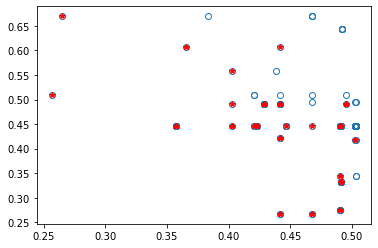

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 13, 1, 2] type <class 'list'>
[5, 0, 1, 20, 19]
0.2156007183
0.32107571659999995
0.4456034902
0.5320257132
0.5320257132
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.5320257132
end_valmod 0.8
sum 0.1473139065238095
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 9, 19, 1] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B3

[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 6] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 15, 19, 1] type <class 'list'>
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 

maxIjogbon 0.423034124
cont_distance 0.557618536
C2 0.5850441068000001
end_valmod 0.7142857142857143
sum 0.11528128319047619
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 19] type <class 'list'>
[0, 1, 2, 20, 5]
0.10634761770000001
0.250800786
0.3531643373
0.42539047080000003
0.42539047080000003
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.42539047080000003
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932

[20, 0, 1, 12, 2]
0.262420471
0.34606212799999997
0.4487565603
0.5133454420000001
0.5133454420000001
maxIjogbon 0.503587055
cont_distance 0.495201728
C2 0.5133454420000001
end_valmod 0.9285714285714286
sum 0.18830273995238092
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 2, 3] type <class 'list'>
[0, 1, 4, 20, 18]
0.1358130431
0.30973163680000004
0.4596809287
0.5432521724
0.5432521724
maxIjogbon 0.490886818
cont_distance 0.446947035
C2 0.5432521724
end_valmod 0.6666666666666666
sum 0.1304931548095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[20, 0, 1, 19, 13]
0.2739028228
0.3690268316
0.48320361570000003
0.5592748492
0.5592748492
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.5592748492
end_valmod 0.9166666666666666
sum 0.181217087
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 14, 0, 1, 20] type <class 'list'>
[5,

[12, 0, 1, 2, 3]
0.23946701099999998
0.28085333079999997
0.3412924259
0.36362597039999994
0.36362597039999994
maxIjogbon 0.503587055
cont_distance 0.495201728
C2 0.36362597039999994
end_valmod 0.9285714285714286
sum 0.199396316047619
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 19, 0, 18, 1] type <class 'list'>
[20, 4, 3, 19, 18]
0.2998367334
0.48727270100000003
0.5824064319000001
0.6630104916
0.6630104916
maxIjogbon 0.490886818
cont_distance 0.446947035
C2 0.6630104916
end_valmod 0.6666666666666666
sum 0.13363287666666665
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[20, 0, 14, 1, 2]
0.26205943749999994
0.345340061
0.4777798238
0.511901308
0.511901308
maxIjogbon 0.428657641
cont_distance 0.491591393
C2 0.511901308
end_valmod 0.8888888888888888
sum 0.1178515030952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type

maxIjogbon 0.490670485
cont_distance 0.495201728
C2 0.5631963264
end_valmod 0.9
sum 0.15208243209523808
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [6, 0, 1, 2, 20] type <class 'list'>
[6, 0, 1, 2, 20]
0.1858229649
0.2646391525999999
0.36250811559999996
0.4222715279999999
0.4222715279999999
maxIjogbon 0.423034124
cont_distance 0.446947035
C2 0.4222715279999999
end_valmod 0.9166666666666666
sum 0.16502986561904762
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 5, 20, 19] type <class 'list'>
[0, 1, 2, 18, 12]
0.12251819719999998
0.283141945
0.40167607580000003
0.49007278880000005


maxIjogbon 0.467361064
cont_distance 0.508226398
C2 0.51855531
end_valmod 0.9090909090909091
sum 0.15990529757142855
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 2, 3] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 19] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.5592748492
end_valmod 0.9166666666666666
sum 0.181217087
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 19, 15, 18] type <class 'list'>
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.6543759271999999
end_valmod 0.8181818181818182
sum 0.13646337633333333
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 15]
0.1345780413
0.3072616332
0.4378556080999999
0.5383121652
0.5383121652
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.5383121652
end_valmod 0.875
sum 0.1220818430952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 15, 20] type <class 'list'>
[5, 0, 17, 1, 2]
0.18254242280000002
0.2549591256
0.36567104699999997
0.39979253119999997
0.3997925311

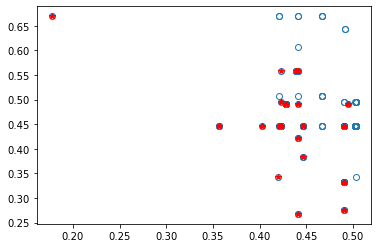

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 13, 1, 2] type <class 'list'>
[5, 0, 20, 17, 1]
0.21216841740000003
0.3142111148
0.4609485157
0.5182965096000001
0.5182965096000001
maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.5182965096000001
end_valmod 0.8888888888888888
sum 0.12432915876190476
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 9, 19, 1] type <class 'list'>
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <_

[15, 0, 1, 14, 2]
0.30632803789999996
0.38960866139999994
0.4919420602
0.5561699084
0.5561699084
maxIjogbon 0.44158265
cont_distance 0.557618536
C2 0.5561699084
end_valmod 0.6666666666666666
sum 0.15067270657142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 8] type <class 'list'>
[0, 1, 2, 3, 18]
0.08026285999999999
0.1986312706
0.27491006419999997
0.32105143999999997
0.32105143999999997
maxIjogbon 0.502584073
cont_distance 0.388765402
C2 0.32105143999999997
end_valmod 0.9090909090909091
sum 0.1668305513809524
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[18, 0, 1, 2, 3]
0.1968924806
0.2382788004
0.2987178955
0.32105144
0.32105144
maxIjogbon 0.502584073
cont_distance 0.388765402
C2 0.32105144
end_valmod 0.9090909090909091
sum 0.1668305513809524
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 19, 18] type <class 'lis

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [3, 0, 1, 2, 4] type <class 'list'>
[17, 0, 20, 19, 1]
0.2586558727
0.364130871
0.5143005728000001
0.5750808676
0.5750808676
maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.5750808676
end_valmod 0.7777777777777778
sum 0.11808592728571429
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 3] type <class 'list'>
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 14]
0.09054545909999999
0.21919646879999996
0.30575786149999995
0.36218183639999996
0.36218183639999996

maxIjogbon 0.503587055
cont_distance 0.495201728
C2 0.36362597039999994
end_valmod 0.9285714285714286
sum 0.199396316047619
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 15, 20, 19]
0.1612368519
0.3605792544
0.5585251846
0.6449474076
0.6449474076
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.6449474076
end_valmod 0.75
sum 0.11576405252380953
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 20, 18] type <class 'list'>
[0, 1, 4, 2, 3]
0.07457534390000001
0.1872562384
0.2759678311
0.29830137560000003
0.29830137560000003
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.29830137560000003
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.4821

[0, 1, 15, 20, 19]
0.1612368519
0.3605792544
0.5585251846
0.6449474076
0.6449474076
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.6449474076
end_valmod 0.75
sum 0.11576405252380953
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [12, 0, 1, 2, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 19, 0, 18, 1] type <class 'list'>
[20, 19, 11, 13, 0]
0.3218177974
0.5483118198000001
0.7165910336000001
0.7509347476
0.7509347476
maxIjogbon 0.420310776
cont_distance 0.669677499
C2 0.7509347476
end_valmod 0.8888888888888888
sum 0.19001495685714284
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 19] type <class 'list'>
[0, 1, 11, 2, 20]
0.1457839376
0.3296734258
0.5233723379999999
0.5831357503999999
0.5831357503999999
maxIjogbon 0.467361064
cont_distance 0.669677499
C2 0.5831357503999999
end_valmod 0.9090909090909091
sum 0.1592431088095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 14, 2] type <class 'list'>
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.50

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 3, 9]
0.0922089596
0.22252346979999998
0.31074836299999997
0.3688358384
0.3688358384
maxIjogbon 0.467361064
cont_distance 0.508226398
C2 0.3688358384
end_valmod 0.9090909090909091
sum 0.19741117619047616
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 13, 20, 19] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 19, 15, 18] type <class 'list'>
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.654375927199999

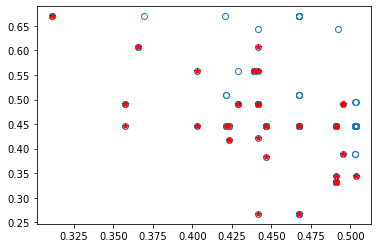

leader <__main__.Particle object at 0x00000203794B3CA0>
Particles[i].best_position [5, 0, 20, 17, 1] type <class 'list'>
[5, 0, 1, 20, 2]
0.18894190770000002
0.26775809539999995
0.3656270584
0.4253904707999999
0.4253904707999999
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.4253904707999999
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 9, 19, 1] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__mai

[0, 1, 2, 14, 20]
0.127975327
0.2940562046
0.4180474652
0.511901308
0.511901308
maxIjogbon 0.428657641
cont_distance 0.491591393
C2 0.511901308
end_valmod 0.8888888888888888
sum 0.1178515030952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 8] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [18, 0, 1, 2, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 3] type <class 'list'>
[0, 1

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [17, 0, 20, 19, 1] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 3] type <class 'list'>
[20, 0, 1, 19, 16]
0.3038449746
0.4289111352
0.5730300711
0.6790434564
0.6790434564
maxIjogbon 0.492027414
cont_distance 0.642858658
C2 0.6790434564
end_valmod 0.8
sum 0.13068413776190477
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 14] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.50

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 15, 20, 19] type <class 'list'>
[0, 1, 2, 7, 20]
0.12102568279999999
0.2801569162
0.39719853259999993
0.48410273119999997
0.48410273119999997
maxIjogbon 0.357032701
cont_distance 0.446947035
C2 0.48410273119999997
end_valmod 0.9
sum 0.12292362714285716
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 2, 3] type <class 'list'>
[0, 1, 4, 20, 11]
0.1639042528
0.3659140562
0.5439545578
0.6556170112
0.6556170112
maxIjogbon 0.310969875
cont_distance 0.669677499
C2 0.6556170112
end_valmod 0.7777777777777778
sum 0.10976396690476191
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
m

[3, 0, 11, 20, 19]
0.18244931529999997
0.3358392882
0.556197011
0.642619234
0.642619234
maxIjogbon 0.421022636
cont_distance 0.669677499
C2 0.642619234
end_valmod 0.875
sum 0.1856805473333333
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 19, 11, 13, 0] type <class 'list'>
[0, 1, 7, 12, 2]
0.1258511521
0.2898078548
0.4388157267
0.5034046084000001
0.5034046084000001
maxIjogbon 0.357032701
cont_distance 0.495201728
C2 0.5034046084000001
end_valmod 0.8
sum 0.13108360523809523
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3CA0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102

[5, 0, 1, 20, 2]
0.18894190770000002
0.26775809539999995
0.3656270584
0.4253904707999999
0.4253904707999999
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.4253904707999999
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 4, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 2, 20, 15]
0.1345780413
0.3072616332
0.4378556080999999
0.5383121652
0.5383121652
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.5383121652
end_valmod 0.875
sum 0.1220818430952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [1, 0, 20, 15, 8] type <class 'list'>
[20, 0, 1, 2, 

[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 19, 2] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>


[0, 1, 13, 20, 19]
0.1398187123
0.3177429752
0.4728526262
0.5592748492
0.5592748492
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.5592748492
end_valmod 0.9166666666666666
sum 0.181217087
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 15] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 20, 19] type <class 'list'>
[5, 0, 1, 20, 2]
0.18894190770000002
0.26775809539999995
0.3656270584
0.4253904707999999
0.4253904707999999
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.4253904707999999
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.086081

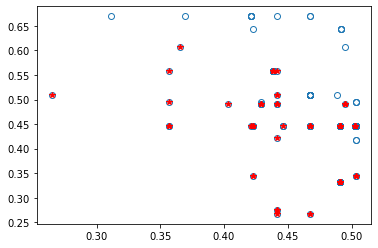

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 20, 17, 1] type <class 'list'>
[5, 0, 1, 2, 3]
0.1515120398
0.1928983596
0.2533374547
0.27567099920000004
0.27567099920000004
maxIjogbon 0.490670485
cont_distance 0.2753143
C2 0.27567099920000004
end_valmod 0.9
sum 0.19113757571428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 13]
0.11315990169999998
0.264425354
0.3736011893
0.45263960680000004
0.45263960680000004
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.45263960680000004
end_valmod 0.9090909090909091
sum 0.18006939376190476
leader <__ma

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 2, 5] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 8, 3] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont

[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 14] type <class 'list'>
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [15, 0, 1, 12, 7] type <class 'list'>
[0, 1, 2, 20, 10]
0.13956347
0.3172324906
0.4528118942
0.55825388
0.55825388
maxIjogbon 0.365543138
cont_distance 0.607472823
C2 0.55825388
end_valmod 0.875
sum 0.12787750238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[20, 0, 1, 19, 2]
0.2546278177
0.330

[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 20, 11] type <class 'list'>
[20, 0, 4, 19, 15]
0.3094572112
0.4401356084
0.6040030297
0.7014924027999999
0.7014924027999999
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.7014924027999999
end_valmod 0.7777777777777778
sum 0.11336884666666668
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 14, 0, 1, 20] type <class 'li

[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 7]
0.12102568279999999
0.2801569162
0.39719853259999993
0.48410273119999997
0.48410273119999997
maxIjogbon 0.357032701
cont_distance 0.446947035
C2 0.48410273119999997
end_valmod 0.9
sum 0.12292362714285716
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 19] type <class 'list'>
[20, 0, 1, 2, 3]

sum 0.13087248385714284
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [1, 0, 20, 15, 8] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 19] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856


[0, 1, 2, 17, 3]
0.0796815384
0.19746862739999999
0.27316609940000003
0.3187261536
0.3187261536
maxIjogbon 0.446606371
cont_distance 0.382952186
C2 0.3187261536
end_valmod 0.8888888888888888
sum 0.1619095964761905
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 17, 

maxIjogbon 0.428657641
cont_distance 0.491591393
C2 0.511901308
end_valmod 0.8888888888888888
sum 0.1178515030952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 6, 16, 19] type <class 'list'>
[0, 1, 3, 20, 2]
0.0860810233
0.21026759720000002
0.2845606808
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 13, 3] type <class 'list'>
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 7, 19, 1] type <class 'list'>
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
maxIjogbon 0.50258407

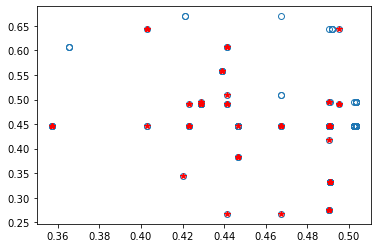

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 20, 17, 1] type <class 'list'>
[5, 0, 20, 19, 1]
0.2156007183
0.3210757166
0.4712454184
0.5320257132
0.5320257132
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.5320257132
end_valmod 0.8
sum 0.1473139065238095
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 13] type <class 'list'>
[7, 0, 1, 20, 6]
0.25933715350000003
0.3498363266
0.45938827500000007
0.5308346728
0.5308346728
maxIjogbon 0.357032701
cont_distance 0.446947035
C2 0.5308346728
end_valmod 0.8
sum 0.12174168238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Pa

[0, 1, 18, 14, 2]
0.1221571637
0.282419878
0.4244008066
0.4886286548
0.4886286548
maxIjogbon 0.44158265
cont_distance 0.491591393
C2 0.4886286548
end_valmod 0.6666666666666666
sum 0.1437565619047619
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 14, 3]
0.09054545909999999
0.21919646879999996
0.30575786149999995
0.36218183639999996
0.36218183639999996
maxIjogbon 0.44158265
cont_distance 0.491591393
C2 0.36218183639999996
end_valmod 0.8888888888888888
sum 0.15535738171428573
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 2

[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[10, 0, 1, 20, 2]
0.3218053169
0.4006215046
0.49849046760000004
0.55825388
0.55825388
maxIjogbon 0.365543138
cont_distance 0.607472823
C2 0.55825388
end_valmod 0.875
sum 0.12787750238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 19] type <class 'list'>
[0, 1, 2, 3, 20]
0.086081023299999

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 19, 11] type <class 'list'>
[0, 1, 3, 20, 4]
0.10420133849999999
0.2465082276
0.3389216264
0.41680535399999996
0.41680535399999996
maxIjogbon 0.490886818
cont_distance 0.446947035
C2 0.41680535399999996
end_valmod 0.9
sum 0.1378115795714286
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 7, 20] type <class 'list'>
[13, 0, 1, 2, 20]
0.21619104369999995
0.29500723139999996
0.39287619439999993
0.4526396067999999
0.4526396067999999
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4526396067999999
end_valmod 0.9090909090909091
sum 0.18006939376190476
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 4, 19, 15] type <class 'list'>
[20, 0, 4, 19, 1]
0.2727481329
0.3667174518
0.49387579479999993


maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 19] type <class 'list'>
[17, 0, 1, 20, 19]
0.2586558727
0.36413087099999997
0.4886586445999999
0.5750808675999999
0.5750808675999999
maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.5750808675999999
end_valmod 0.7777777777777778
sum 0.11808592728571429
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 7, 12, 2] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487

maxIjogbon 0.423034124
cont_distance 0.446947035
C2 0.5289067704
end_valmod 0.8333333333333334
sum 0.15871207504761903
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 20, 19] type <class 'list'>
[5, 0, 1, 2, 20]
0.18894190770000002
0.26775809539999995
0.3656270584
0.4253904707999999
0.4253904707999999
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.4253904707999999
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 20, 19] type <class 'list'>
[0, 1, 5, 20, 2]
0.10634761770000001
0.250800786
0.3656270584
0.42539047080000003
0.42539047080000003
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.42539047080000003
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995

maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 18, 20, 2] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[20, 0, 1, 5, 19]
0.2670905388
0.3554022636
0.46276676370000003
0.5320257132
0.5320257132
maxIjogbon 0.4906

0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[11, 0, 1, 20, 2]
0.34668718730000003
0.425503375
0.5233723379999999
0.5831357504
0.5831357504
maxIjogbon 0.467361064
cont_distance 0.669677499
C2 0.5831357504
end_valmod 0.9090909090909091
sum 0.1592431088095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 19, 15, 18] type <class 'list'>
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.6543759271999999
end_valmod 0.8181818181818182
sum 0.13646337633333333
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[20, 0, 1, 19, 2]
0.2546278177
0.330476

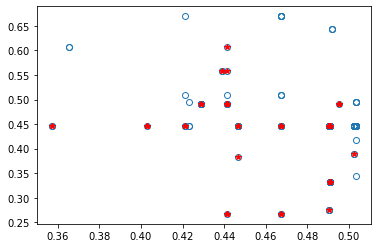

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 20, 19, 1] type <class 'list'>
[5, 0, 20, 19, 16]
0.2608338088
0.4115418976
0.6069446899
0.7129580752
0.7129580752
maxIjogbon 0.490670485
cont_distance 0.642858658
C2 0.7129580752
end_valmod 0.8181818181818182
sum 0.11903485504761903
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[5, 0, 4, 14, 8]
0.21916418499999998
0.32820265000000004
0.4704301391
0.54627958
0.54627958
maxIjogbon 0.495201728
cont_distance 0.491591393
C2 0.54627958
end_valmod 0.5
sum 0.14279632238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 13] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00

maxIjogbon 0.44158265
cont_distance 0.557618536
C2 0.5561699084
end_valmod 0.6666666666666666
sum 0.15067270657142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 2, 5] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[11, 0, 1, 2, 3]
0.3092573194
0.35064363919999997
0.4110827343
0.43341627879999994
0.43341627879999994
maxIjogbon 0.467361064
cont_distance 0.669677499
C2 0.43341627879999994
end_valmod 0.9090909090909091
sum 0.1967489874285714
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [10, 0, 1, 20, 2] type <class 'list'>
[0, 1, 2, 11, 3]
0.10835406969999999
0.25481369000000004
0.3591836933
0.43341627880000005
0.43341627880000005
maxIjogbon 0.467361064
cont_distance 0.669677499
C2 0.43341627880000005
end_valmod 0.9090909090909091
sum 0.1967489874285714
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 19] type <class 'list'>
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.4253786004

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 3, 20, 4] type <class 'list'>
[0, 1, 14, 2, 20]
0.127975327
0.29405620460000004
0.45213789560000006
0.511901308
0.511901308
maxIjogbon 0.428657641
cont_distance 0.491591393
C2 0.511901308
end_valmod 0.8888888888888888
sum 0.1178515030952381
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 7, 20] type <class 'list'>
[0, 1, 18, 2, 3]
0.08026286
0.1986312706
0.2987178955
0.32105144
0.32105144
maxIjogbon 0.502584073
cont_distance 0.388765402
C2 0.32105144
end_valmod 0.9090909090909091
sum 0.1668305513809524
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 4, 19, 1] type <class 'list'>
[0, 1, 4, 20, 2]
0.1120052118
0.2621159742
0.38825743479999997
0.4480208472
0.4480208472
maxIjogbon 0.490886818
cont_d

[0, 1, 13, 2, 20]
0.11315990169999998
0.264425354
0.3928761944
0.4526396067999999
0.4526396067999999
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4526396067999999
end_valmod 0.9090909090909091
sum 0.18006939376190476
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[4, 0, 1, 20, 2]
0.21157228409999998
0.29038847179999994
0.38825743479999997
0.4480208471999999
0.4480208471999999
maxIjogbon 0.490886818
cont_distance 0.446947035
C2 0.4480208471999999
end_valmod 0.9
sum 0.13719027442857146
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 7, 12, 2] type <class 'list'>
[10, 0, 1, 2, 3]
0.284375449
0.32576176879999996
0.38620086389999997
0.4085344084
0.4085344084
maxIjogbon 0.44158265
cont_distance 0.607472823
C2 0.4085344084
end_valmod 0.875
sum 0.16538338099999997
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 19] type <cla

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 13, 3]
0.07573003379999999
0.18956561819999995
0.26131158559999995
0.30292013519999994
0.30292013519999994
maxIjogbon 0.503587055
cont_distance 0.34343714
C2 0.30292013519999994
end_valmod 0.9090909090909091
sum 0.19291715323809525
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 20, 19] type <class 'list'>
[5, 0, 9, 20, 1]
0.22469583860000003
0.3392659572
0.5046587156
0.5684061944
0.5684061944
maxIjogbon 0.369072145
cont_distance 0.508226398
C2 0.5684061944
end_valmod 0.7777777777777778
sum 0.12621569114285713
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 20, 19] type <class 'list'>
[20, 0, 1, 12, 19]
0.2890792816
0.3993797492000001
0.5287329921
0.619

maxIjogbon 0.421022636
cont_distance 0.669677499
C2 0.6897709928
end_valmod 0.8181818181818182
sum 0.15071872642857143
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 19, 18, 17] type <class 'list'>
[20, 0, 12, 8, 1]
0.2740420637
0.36930531340000006
0.5140887359
0.5598318128
0.5598318128
maxIjogbon 0.467361064
cont_distance 0.495201728
C2 0.5598318128
end_valmod 0.8888888888888888
sum 0.1755046311428571
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 18, 20, 2] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
max

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[7, 0, 1, 2, 3]
0.2102243002
0.25161062
0.31204971509999996
0.3343832595999999
0.3343832595999999
maxIjogbon 0.44158265
cont_distance 0.422094951
C2 0.3343832595999999
end_valmod 0.9
sum 0.1604295057619048
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [11, 0, 1, 20, 2] type <class 'list'>
[0, 1, 9, 20, 2]
0.12963882750000003
0.2973832056
0.4587918976
0.51855531
0.51855531
maxIjogbon 0.467361064
cont_distance 0.508226398
C2 0.51855531
end_valmod 0.9090909090909091
sum 0.15990529757142855
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 19, 18, 17] type <class 'list'>
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_di

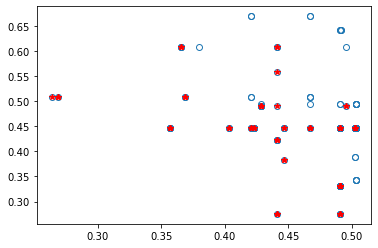

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 20, 19, 1] type <class 'list'>
[5, 0, 1, 2, 3]
0.1515120398
0.1928983596
0.2533374547
0.27567099920000004
0.27567099920000004
maxIjogbon 0.490670485
cont_distance 0.2753143
C2 0.27567099920000004
end_valmod 0.9
sum 0.19113757571428572
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[0, 1, 20, 19, 8]
0.13216529989999998
0.3024361504
0.46024337849999997
0.5286611995999999
0.5286611995999999
maxIjogbon 0.421022636
cont_distance 0.446947035
C2 0.5286611995999999
end_valmod 0.75
sum 0.16852951376190475
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
su

maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 18, 14, 2] type <class 'list'>
[0, 12, 20, 19, 18]
0.174818936
0.44867821760000004
0.6186716843
0.699275744
0.699275744
maxIjogbon 0.502584073
cont_distance 0.495201728
C2 0.699275744
end_valmod 0.9166666666666666
sum 0.1471844346190476
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 20, 19, 6]
0.1322266926
0.3025589358
0.4604275566
0.5289067704
0.5289067704
maxIjogbon 0.423034124
con

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [11, 0, 1, 2, 3] type <class 'list'>
[18, 0, 20, 1, 2]
0.23432234850000003
0.3131385362
0.4366494274
0.4707709116
0.4707709116
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.4707709116
end_valmod 0.8888888888888888
sum 0.13143750461904763
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [10, 0, 1, 20, 2] type <class 'list'>
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 19] type <class 'list'>
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543

[0, 1, 2, 20, 4]
0.11200521179999998
0.2621159742
0.37013711959999995
0.4480208471999999
0.4480208471999999
maxIjogbon 0.490886818
cont_distance 0.446947035
C2 0.4480208471999999
end_valmod 0.9
sum 0.13719027442857146
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 3, 20, 4] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 7, 20] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 20, 2] type 

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 13, 2, 20] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 20, 4]
0.11200521179999998
0.2621159742
0.37013711959999995
0.4480208471999999
0.4480208471999999
maxIjogbon 0.490886818
cont_distance 0.446947035
C2 0.4480208471999999
end_valmod 0.9
sum 0.13719027442857146
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 7, 12, 2] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
m

Particles[i].best_position [0, 1, 2, 13, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 9, 20, 1] type <class 'list'>
[0, 3, 20, 19, 1]
0.1127398339
0.24000933899999993
0.3901790408
0.4509593356
0.4509593356
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4509593356
end_valmod 0.9230769230769231
sum 0.1819489277142857
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 4, 20, 19] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best

[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 12, 8, 1] type <class 'list'>
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
maxIjogbon 0.446606371
cont_distance 0.446947035
C2 0.6543759271999999
end_valmod 0.8181818181818182
sum 0.13646337633333333
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 18, 20, 2] type <class 'l

cont_distance 0.446947035
C2 0.6543759271999999
end_valmod 0.8181818181818182
sum 0.13646337633333333
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 12]
0.1283363605
0.2947782716
0.4191305657
0.513345442
0.513345442
maxIjogbon 0.503587055
cont_distance 0.495201728
C2 0.513345442
end_valmod 0.9285714285714286
sum 0.18830273995238092
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [7, 0, 1, 2, 3] type <class 'list'>
[0, 1, 2, 14, 3]
0.09054545909999999
0.21919646879999996
0.30575786149999995
0.36218183639999996
0.36218183639999996
maxIjogbon 0.44158265
cont_distance 0.491591393
C2 0.36218183639999996
end_valmod 0.8888888888888888
sum 0.15535738171428573
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 9, 20, 2] type <class 'list'>
[0, 1, 20, 19, 13]
0.1398187123
0.31774297519999994
0.4832036156999999
0.5592748491999999
0.559274

[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
sum 0.18132762257142856


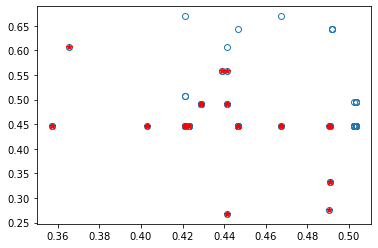

leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 1, 2, 3] type <class 'list'>
[4, 0, 20, 19, 1]
0.23823109469999998
0.343706093
0.49387579479999993
0.5546560895999999
0.5546560895999999
maxIjogbon 0.490886818
cont_distance 0.446947035
C2 0.5546560895999999
end_valmod 0.8
sum 0.13087248385714284
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[0, 1, 5, 16, 8]
0.13756037270000002
0.313226296
0.45926532340000004
0.5502414908000001
0.5502414908000001
maxIjogbon 0.495201728
cont_distance 0.642858658
C2 0.5502414908000001
end_valmod 0.75
sum 0.14997887876190477
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 2, 17, 3]
0.0796815384
0.19746862739999999
0.27316609940000003
0.3187261536
0.3187261536
maxIjogbon 0.446606371
cont_distance 0.382952186
C2 0.3187261536
end_valmod 0.8888888888888888
sum 0.1619095

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 18, 14, 2] type <class 'list'>
[0, 1, 15, 2, 3]
0.0971481734
0.23240189739999995
0.3662591490999999
0.3885926935999999
0.3885926935999999
maxIjogbon 0.44158265
cont_distance 0.557618536
C2 0.3885926935999999
end_valmod 0.875
sum 0.15958772171428573
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 16, 3]
0.1056721856
0.24944992179999997
0.35113804099999996
0.42268874239999993
0.42268874239999993
maxIjogbon 0.492027414
cont_distance 0.642858658
C2 0.42268874239999993
end_valmod 0.8888888888888888
sum 0.17450780695238094
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 6] type <class 'list'>
[0, 1, 2, 10, 11]
0.16183651640000002
0.3617785834
0.5196310333999

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [11, 0, 1, 2, 3] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [10, 0, 1, 20, 2] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 1, 2, 19] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogb

maxIjogbon 0.423034124
cont_distance 0.446947035
C2 0.5289067704
end_valmod 0.8333333333333334
sum 0.15871207504761903
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 3, 20, 4] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 18, 19] type <class 'list'>
[0, 1, 2, 7, 3]
0.08359581489999998
0.20529718040000003
0.2849089289
0.33438325960000004
0.334383259600

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 13, 2, 20] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 18, 2, 20]
0.1176927279
0.2734910064
0.4110074992
0.4707709116
0.4707709116
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.4707709116
end_valmod 0.8888888888888888
sum 0.13143750461904763
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055


maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 19, 3]
0.08311383929999999
0.20433322919999997
0.28346300209999997
0.33245535719999997
0.33245535719999997
maxIjogbon 0.503587055
cont_distance 0.417275195
C2 0.33245535719999997
end_valmod 0.9230769230769231
sum 0.19067578866666665
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [5, 0, 9, 20, 1] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 4, 20, 19] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.34432

cont_distance 0.34343714
C2 0.3839865128
end_valmod 0.9
sum 0.158777333
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [20, 0, 19, 18, 17] type <class 'list'>
[0, 1, 2, 10, 20]
0.13956347
0.3172324906
0.4528118942
0.55825388
0.55825388
maxIjogbon 0.365543138
cont_distance 0.607472823
C2 0.55825388
end_valmod 0.875
sum 0.12787750238095238
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 18, 20, 2] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995

maxIjogbon 0.503587055
cont_distance 0.495201728
C2 0.513345442
end_valmod 0.9285714285714286
sum 0.18830273995238092
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 14, 3] type <class 'list'>
[0, 1, 2, 20, 7]
0.12102568279999999
0.2801569162
0.39719853259999993
0.48410273119999997
0.48410273119999997
maxIjogbon 0.357032701
cont_distance 0.446947035
C2 0.48410273119999997
end_valmod 0.9
sum 0.12292362714285716
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 9, 20, 2] type <class 'list'>
[0, 1, 2, 14, 3]
0.09054545909999999
0.21919646879999996
0.30575786149999995
0.36218183639999996
0.36218183639999996
maxIjogbon 0.44158265
cont_distance 0.491591393
C2 0.36218183639999996
end_valmod 0.8888888888888888
sum 0.15535738171428573
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0

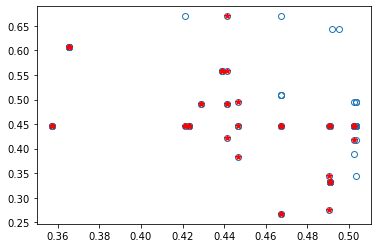

leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [5, 0, 1, 2, 3] type <class 'list'>
[0, 8, 1, 20, 19]
0.13216529989999998
0.317711203
0.4422389766
0.5286611996
0.5286611996
maxIjogbon 0.421022636
cont_distance 0.446947035
C2 0.5286611996
end_valmod 0.75
sum 0.16852951376190475
leader <__main__.Particle object at 0x000002037A0CFC10>
Particles[i].best_position [5, 0, 4, 14, 8] type <class 'list'>
[20, 0, 1, 14, 8]
0.2736810302
0.3685832464
0.48253823790000006
0.5583876788000001
0.5583876788000001
maxIjogbon 0.403059166
cont_distance 0.491591393
C2 0.5583876788000001
end_valmod 0.75
sum 0.11013779990476191
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 17, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Par

maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 16, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 20, 19, 6] type <class 'list'>
[0, 1, 8, 20, 2]
0.10550648929999999
0.2491185292
0.3622625448
0.42202595719999997
0.42202595719999997
maxIjogbon 0.467361064
cont_distance 0.446947035
C2 0.42202595719999997
end_valmod 0.875
sum 0.17705389614285713
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.34432

[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x000002037A0CFC10>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2

[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 7, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 19, 20, 2] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [5, 0, 20, 19

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>

0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1

[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 18, 20, 2] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 2, 20, 5]
0.10634761770000001
0.250800786
0.3531643373
0.42539047080000003
0.42539047080000003
maxIjogbon 0.490670485
cont_distance 0.446947035
C2 0.42539047080000003
end_valmod 0.9
sum 0.1536316970952381
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 20, 11]
0.1457839376
0.3296734258
0.471473297
0.5831357504
0.5831357504
maxIjogbon 0.467361064
cont_distance 0.669677499
C2 0.5831357504
end_valmod 0.9090909090909091
sum 0.1592431088095238
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 11]
0.1457839376
0.3296734258
0.471473297
0.5831357504
0.5831357504
maxIjogbon 0.467361064
cont_distance 0.669677499
C2 0.5831357504
end_valmod 0.9090909090909091
sum 0.1592431088095238
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0

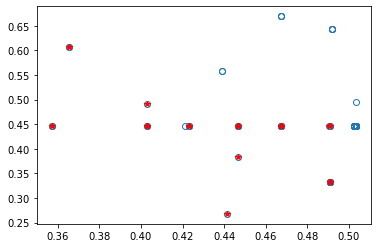

leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 8, 1, 20, 19] type <class 'list'>
[0, 4, 1, 20, 2]
0.1120052118
0.29038847179999994
0.38825743479999997
0.4480208471999999
0.4480208471999999
maxIjogbon 0.490886818
cont_distance 0.446947035
C2 0.4480208471999999
end_valmod 0.9
sum 0.13719027442857146
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [20, 0, 1, 14, 8] type <class 'list'>
[0, 1, 2, 16, 8]
0.1250976516
0.28830085380000003
0.409414439
0.5003906064000001
0.5003906064000001
maxIjogbon 0.44158265
cont_distance 0.642858658
C2 0.5003906064000001
end_valmod 0.6
sum 0.1616723936190476
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__m

Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x000002037A0CFC10>
Particles[i].best_position [0, 1, 2, 16, 3] type <class 'list'>
[0, 1, 2, 3, 10]
0.1021336021
0.2423727548
0.3405222905
0.4085344084
0.4085344084
maxIjogbon 0.44158265
cont_distance 0.607472823
C2 0.4085344084
end_valmod 0.875
sum 0.16538338099999997
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 20, 19, 6] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2,

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.5035

[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 7, 3] type <class 'list'>
[0, 1, 2, 3,

[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[

[0, 1, 2, 20, 15]
0.1345780413
0.3072616332
0.4378556080999999
0.5383121652
0.5383121652
maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.5383121652
end_valmod 0.875
sum 0.1220818430952381
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 19, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 19]


[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [20, 0, 1, 19, 2] type <class 'list'>
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x000002037A0CFC10>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 20, 1, 19, 10]
0.1662222806
0.42183396819999996
0.5624143206
0.6648891224
0.6648891224
maxIjogbon 0.365543138
cont_distance 0.607472823
C2 0.6648891224
end_valmod 0.7777777777777778
sum 0.1215597118095238
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 5] type <class 'list'>
[0, 1, 

[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 14, 3] type <class 'list'>
[0, 1, 2, 19, 12]
0.12536917649999998
0.2888439036
0.4102290137000001
0.501476706
0.501476706
maxIjogbon 0.503587055
cont_distance 0.495201728
C2 0.501476706
end_valmod 0.9230769230769231
sum 0.18132762257142854
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 11] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 20, 11] type <class 'list'

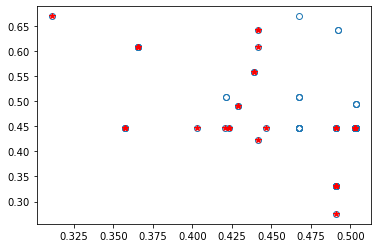

leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 4, 1, 20, 2] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 16, 8] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x0

[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 11, 20]
0.1457839376
0.3296734258
0.4714732969999999
0.5831357504
0.5831357504
maxIjogbon 0.467361064
cont_distance 0.669677499
C2 0.5831357504
end_valmod 0.9090909090909091
sum 0.1592431088095238
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 20, 2, 19]
0.120

maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
m

0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 3, 12] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [20, 0, 1, 19, 15] type <class 'list'>
[0, 1, 20, 19, 18]


[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [14, 

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 20, 16] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 13, 1, 20, 16] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_d

leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 20, 18, 19]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x

[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
maxIjogbon 0.502584073
cont_distance 0.446947035
C2 0.577406154
end_valmod 0.7777777777777778
sum 0.12511971404761904
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [20, 0, 1, 2, 8] type <class 'list'>
[0, 7, 20, 19, 18]
0.1675082583
0.4194355068
0.5894289735
0.6700330332
0.6700330332
maxIjogbon 0.357032701
cont_distance 0.446947035
C2 0.6700330332
end_valmod 0.75
sum 0.12514888414285716
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 9, 1, 20, 2] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.2791929649999999

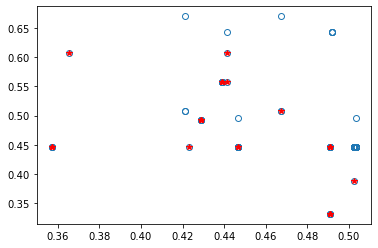

leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 15]
0.0971481734
0.2324018974
0.3255660044
0.3885926936
0.3885926936
maxIjogbon 0.44158265
cont_distance 0.557618536
C2 0.3885926936
end_valmod 0.875
sum 0.15958772171428573
leader <__main__.Pa

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 10] type <class 'list'>
[0, 1, 2, 17, 3]
0.0796815384
0.19746862739999999
0.27316609940000003
0.3187261536
0.3187261536
maxIjogbon 0.446606371
cont_distance 0.382952186
C2 0.3187261536
end_valmod 0.8888888888888888
sum 0.1619095964761905
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 11, 20] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.34432409

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.298301375

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 12] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.344324093

C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818


maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 20, 16] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.298301375599999

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [20, 0, 1, 19, 2] type <class 'list'>
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.298

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 19, 12] type <class 'list'>
[0, 1, 18, 2, 3]
0.08026286
0.1986312706
0.2987178955
0.32105144
0.32105144
maxIjogbon 0.502584073
cont_distance 0.388765402
C2 0.32105144
end_valmod 0.9090909090909091
sum 0.1668305513809524
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.298301375599

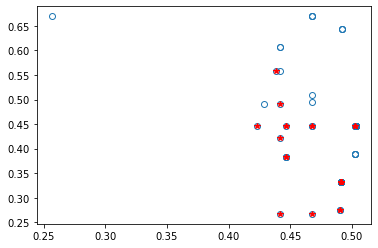

leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x000002037A03E670>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 11]
0.10835406969999999
0.25481369
0.3591836933
0.43341627879999994
0.43341627879999994
maxIjogbon 0.467361064
cont_distance 0.669677499
C2 0.43341627879999994
end_valmod 0.9090909090909091
sum 0.1967489874285714
leader <__main__.Particle object at 0x000002037A03E670>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.48217482879999995
end_valmod 0.9

[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 10] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 18, 3] type <class 'list'>
[0, 1, 2, 8, 3]
0.0680766214
0.1742587934
0.23835134840000002
0.27230648560000004
0.27230648560000004
maxIjogbon 0.467361064
cont_distance 0.266903016
C2 0.27230648560000004
end_valmod 0.875
sum 0.21455977476190474
leader <__main__.Particle object at 0x000002037A03E670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E670>
Particles[i].best_position [0, 1, 2, 20,

maxIjogbon 0.438764182
cont_distance 0.557618536
C2 0.5383121652
end_valmod 0.875
sum 0.1220818430952381
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 2, 15] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjog

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 2] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.

[0, 1, 20, 19, 11]
0.1724427482
0.382991047
0.5810757234
0.6897709928
0.6897709928
maxIjogbon 0.421022636
cont_distance 0.669677499
C2 0.6897709928
end_valmod 0.8181818181818182
sum 0.15071872642857143
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 20] type <c

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 5]
0.0689177498
0.1759410502
0.24087473359999997
0.2756709992
0.2756709992
maxIjogbon 0.490670485
cont_distance 0.2753143
C2 0.2756709992
end_valmod 0.9
sum 0.19113757571428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 20, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [20, 0, 19, 1, 2] type <class 'list'>
[4, 0, 1, 2, 3]
0.17414241619999998
0.215528736
0.2759678311
0.29830137560000003
0.29830137560000003

[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 16, 2, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 18, 2, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


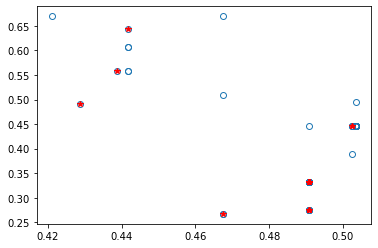

leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 3, 20, 2]
0.0860810233
0.21026759720000002
0.2845606808
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 10] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.298

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 8, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 20, 2, 19] type <class 'list'>
[0, 1, 9, 2, 3]
0.0922089596
0.22252346979999996
0.3465022938999999
0.36883583839999995
0.36883583839999995
maxIjogbon 0.467361064
cont_distance 0.508226398
C2 0.36883583839999995
end_valmod 0.9090909090909091
sum 0.19741117619047616
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.210267597200000

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 20, 2, 3] type <class 'list'>
[0, 1, 2, 3, 5]
0.0689177498
0.1759410502
0.24087473359999997
0.2756709992
0.2756709992
maxIjogbon 0.490670485
cont_distance 0.2753143
C2 0.2756709992
end_valmod 0.9
sum 0.19113757571428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3,

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 13, 2, 17] type <class 'list'>
[0, 1, 20, 2, 6]
0.105567882
0.2492413146
0.38045112480000004
0.422271528
0.422271528
maxIjogbon 0.423034124
cont_distance 0.446947035
C2 0.422271528
end_valmod 0.9166666666666666
sum 0.16502986561904762
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

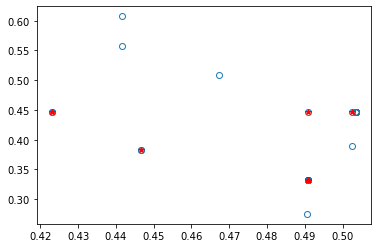

leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 3, 20, 2] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.173482

leader <__main__.Particle object at 0x000002037A05C8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 20, 2, 19] type <class 'list'>
[0, 1, 20, 6, 19]
0.1322266926
0.30255893579999993
0.4604275565999999
0.5289067703999999
0.5289067703999999
maxIjogbon 0.423034124
cont_distance 0.446947035
C2 0.5289067703999999
end_valmod 0.8333333333333334
sum 0.15871207504761903
leader <__main__.Particle object at 0x000002037A05C8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.2578475158999

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 5] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 6, 2, 20]
0.105567882
0.2492413146
0.36250811559999996
0.422271528
0.422271528
maxIjogbon 0.423034124
cont_distance 0.446947035
C2 0.422271528
end_valmod 0.9166666666666666
sum 0.16502986561904762
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 13, 2, 17] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

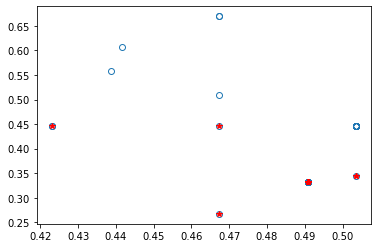

leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 3, 20, 2] type <class 'list'>
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
s

0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type

0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'li

maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.29830137559

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 10, 20, 2]
0.13956347000000002
0.3172324906
0.49849046760000004
0.55825388
0.55825388
maxIjogbon 0.365543138
cont_distance 0.607472823
C2 0.55825388
end_valmod 0.875
sum 0.12787750238095238
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.34432409

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 13, 2, 17] type <class 'list'>
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.4821748288
end_valmod 0.9230769230769231
sum 0.18132762257142856
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 20, 19] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.29

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

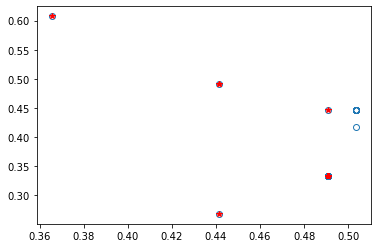

leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 3, 20, 2] type <class 'list'>
[0, 1, 8, 2, 3]
0.0680766214
0.17425879339999997
0.24997294109999996
0.2723064856
0.2723064856
maxIjogbon 0.467361064
cont_distance 0.266903016
C2 0.2723064856
end_valmod 0.875
sum 0.21455977476190474
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.173482462

sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.298301375599999

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.29236455

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 20, 2, 19] type <class 'list'>
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
maxIjogbon 0.503587055
cont_distance 0.446947035
C2 0.3443240932
end_valmod 0.9285714285714286
sum 0.1912363379523809
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 20, 19, 4]
0.1386640224
0.3154335954
0.47973954599999996
0.5546560896
0.5546560896
maxIjogbon 0.490886818
cont_distance 0.446947035
C2 0.5546560896
end_valmod 0.8
sum 0.13087248385714284
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 20, 2, 19] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.29

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

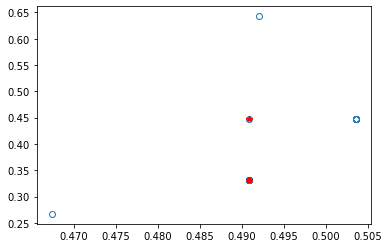

leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 8, 2, 3] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 20] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.298

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 20, 19, 18] type <class 'list'>
[0, 1, 2, 3, 10]
0.1021336021
0.2423727548
0.3405222905
0.4085344

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particl

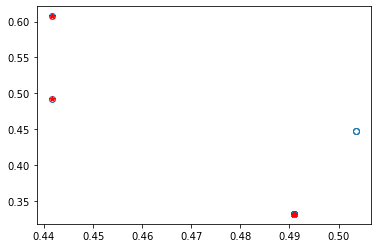

leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 8, 2, 3] type <class 'list'>
[0, 1, 16, 2, 3]
0.1056721856
0.24944992179999997
0.4003551978999999
0.42268874239999993
0.42268874239999993
maxIjogbon 0.492027414
cont_distance 0.642858658
C2 0.42268874239999993
end_valmod 0.8888888888888888
sum 0.17450780695238094
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7C0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 10] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.298

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

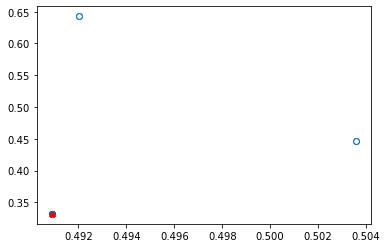

leader <__main__.Particle object at 0x00000203794B3A90>
Particles[i].best_position [0, 1, 16, 2, 3] type <class 'list'>
[0, 1, 17, 2, 6]
0.0991683971
0.2364423448
0.3548531852
0.3966735884
0.3966735884
maxIjogbon 0.44158265
cont_distance 0.382952186
C2 0.3966735884
end_valmod 0.75
sum 0.15468467028571428
leader <__main__.Particle object at 0x000002037A05C850>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B36D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E130>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7C0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EC70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B31C0>
Particles[i].best_position [0, 

0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B37C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type

C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2CA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C850>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.4908

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E700>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


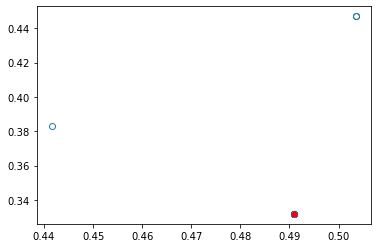

leader <__main__.Particle object at 0x000002037A03E3A0>
Particles[i].best_position [0, 1, 17, 2, 6] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.91666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2EE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2B50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2B50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3610>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2CA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CF10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.298301375599999

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C850>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

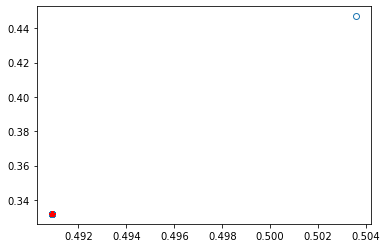

leader <__main__.Particle object at 0x000002037A05C550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C850>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3B80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C910>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C910>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CDF0>
Particles[i].best_position [0, 

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3B80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC70>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CB80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E9A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

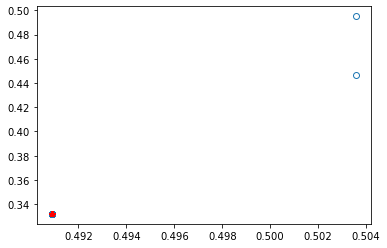

leader <__main__.Particle object at 0x000002037A03E640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C0D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C910>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C910>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CEB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E610>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAF0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2AC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E6D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E4C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2AC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E940>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C1C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


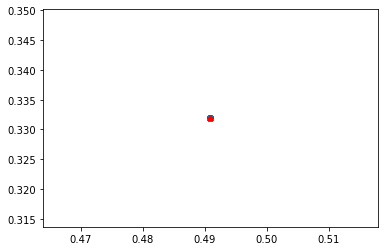

leader <__main__.Particle object at 0x000002037A05CC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2EE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C27C0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E610>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CCA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 

cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.29830137

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EC10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C22E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

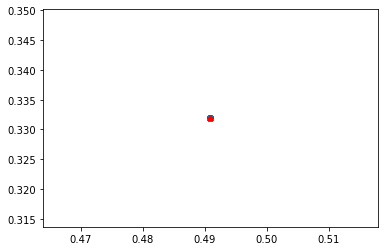

leader <__main__.Particle object at 0x000002037A03ED60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EFA30>
Particles[i].best_position [0, 1, 2, 3, 4] type

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E760>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EF730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EEE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E4C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C160>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED30>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ECA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E9A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particl

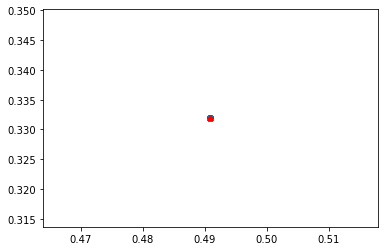

leader <__main__.Particle object at 0x000002037A03E6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D90>
Particles[i].best_position [0, 

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E880>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3610>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EFA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E9A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2BB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3D00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E5E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2C40>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


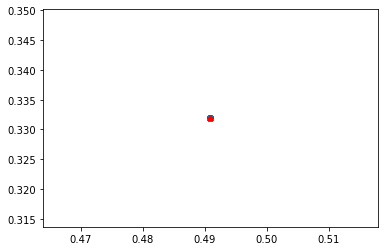

leader <__main__.Particle object at 0x000002037A03EA90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2CA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C27C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E940>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C27C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E700>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B36D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C4C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3430>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C20D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EE20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B32E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CD00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E880>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2BB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

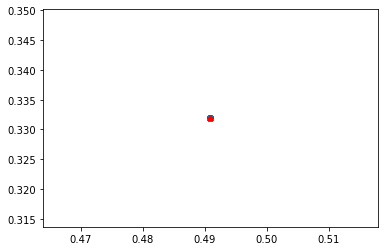

leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2EE0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E0A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C22E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3430>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2CA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B32E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E2E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E2E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C190>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C160>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E130>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


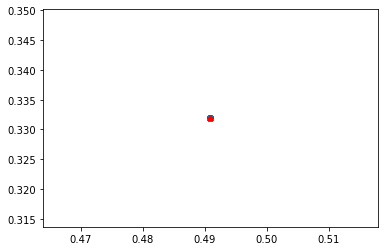

leader <__main__.Particle object at 0x000002037A03EE80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E0A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C4C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C27C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EEB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E9D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C4C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C850>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2B50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CEB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


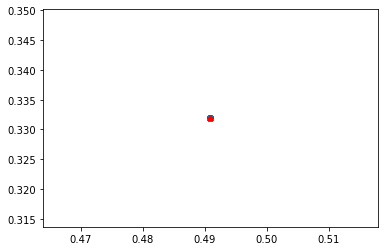

leader <__main__.Particle object at 0x000002037A03EB50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E130>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EFA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.4908

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EBB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAC0>
Particles[i].best_position [0, 

cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C24C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.29830137

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3610>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C190>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CDF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B38B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E0A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E4C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

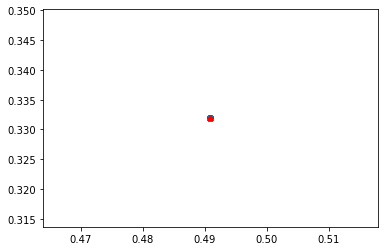

leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3D00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2AC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E6D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E4C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CEB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C27C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CF10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

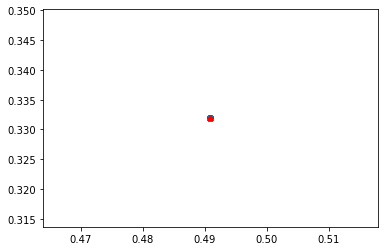

leader <__main__.Particle object at 0x00000203794B36D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EE50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E8E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EFA30>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B30A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EEE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C22E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3640>
Particles[i].best_position [0, 

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E9D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B30A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C0A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C910>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


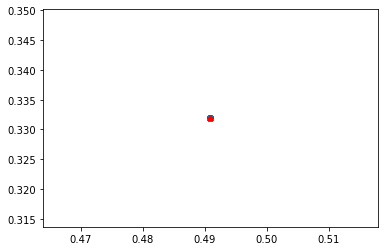

leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E610>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C22E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C27C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EAF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

leader <__main__.Particle object at 0x000002037A05CB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EBB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C24C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particl

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C24C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


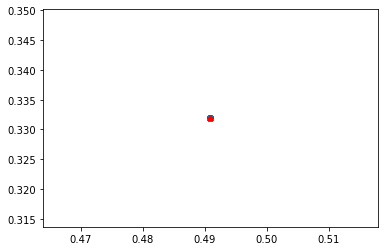

leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C130>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B36D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF6A0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CEB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C190>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2BB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E430>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CCA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E160>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E8E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C1C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EE80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C1C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

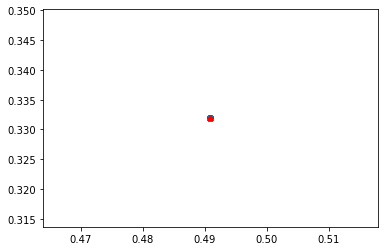

leader <__main__.Particle object at 0x000002037A03EEB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E490>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E280>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E9D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CE50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C130>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B30A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C1C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EF730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EE80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B35B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


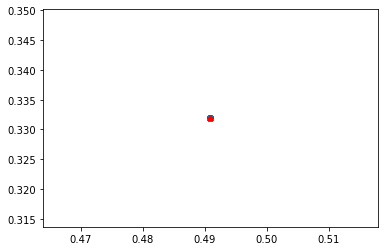

leader <__main__.Particle object at 0x00000203794B3A90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EFA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 

C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.4908

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E310>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF6A0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E940>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


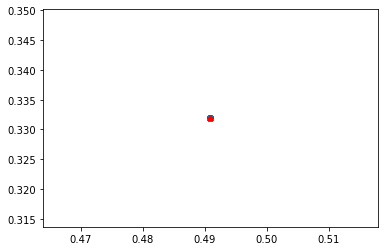

leader <__main__.Particle object at 0x000002037A05C4C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2760>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E9A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C250>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C23D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CEE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E610>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E2E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2760>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E0A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

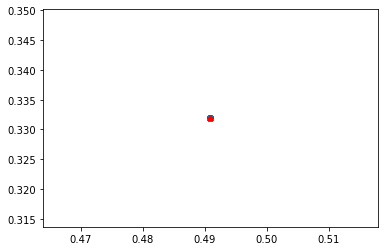

leader <__main__.Particle object at 0x00000203794C2F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E9A0>
Particles[i].best_position [0, 

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C24C0>
Particles[i].best_position [0, 

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E280>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2EE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EEB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CEB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E1F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2F40>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

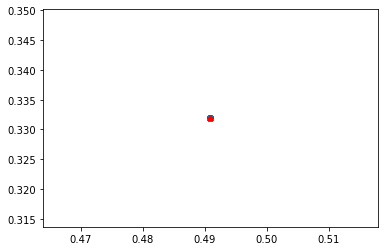

leader <__main__.Particle object at 0x000002037A03E7C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EAF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C23D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C070>
Particles[i].best_position [0, 1, 2, 3, 4] type

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B31C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E8E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E1C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CA00>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C23D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3430>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E280>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3430>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CDF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


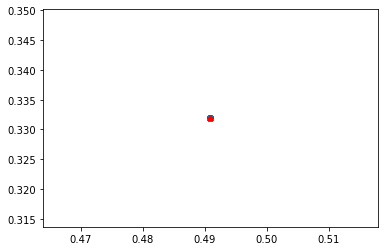

leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B38B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particl

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B31C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CE20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2580>
Particles[i].best_position [0, 

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E490>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B31C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C0D0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EBB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C20D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CB50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

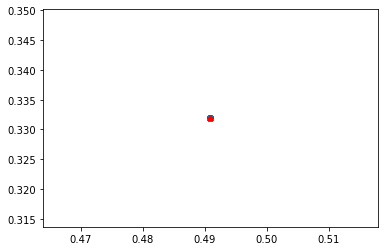

leader <__main__.Particle object at 0x000002037A03ED00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C3A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2EE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E2B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E0D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CB50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C27C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C22E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2EE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.298301375599999

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E130>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EC70>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

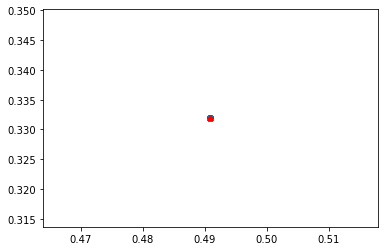

leader <__main__.Particle object at 0x000002037A0CF6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E5E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.298301375599999

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CB50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C20D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E8B0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E1F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ECA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B31C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B32E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C20D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C910>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E910>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CB20>
Particles[i].best_position [0, 

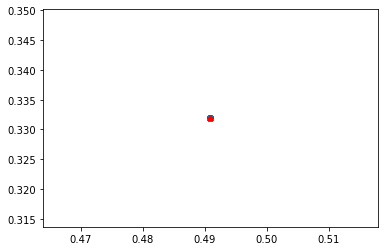

leader <__main__.Particle object at 0x00000203794C2760>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E430>
Particles[i].best_position [0, 

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E880>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB80>
Particles[i].best_position [0, 

0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3580>
Particles[i].best_position [0, 1, 2, 3, 4] type

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E700>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3AF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2BB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.4908

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C340>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C0A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particl

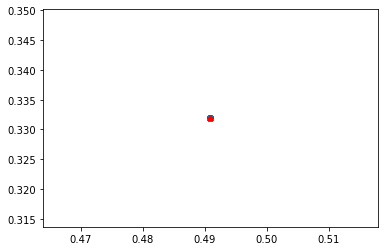

leader <__main__.Particle object at 0x000002037A03E670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E880>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C340>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CA00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.298301375599999

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF6A0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E280>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E280>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

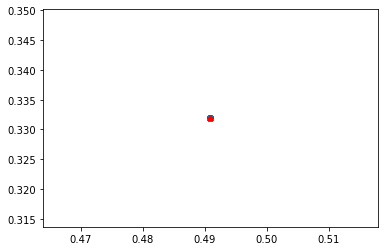

leader <__main__.Particle object at 0x000002037A03E460>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E100>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E100>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CDF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C0A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2B50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E490>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B31C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E610>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E0D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B33A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C27C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


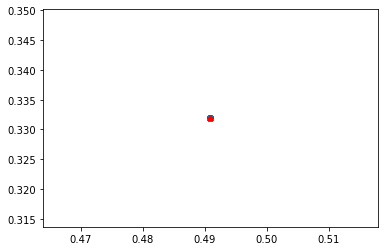

leader <__main__.Particle object at 0x000002037A03E160>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E490>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E160>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CE20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E760>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EE50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C760>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C190>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C27C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C340>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2760>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EC10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E610>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

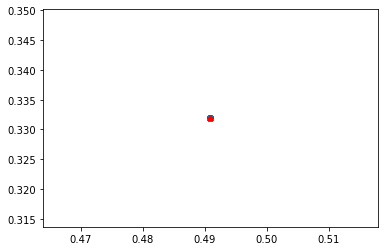

leader <__main__.Particle object at 0x00000203794C2E50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CEE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3B80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2CA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3B80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CE50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C0A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particl

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C0A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


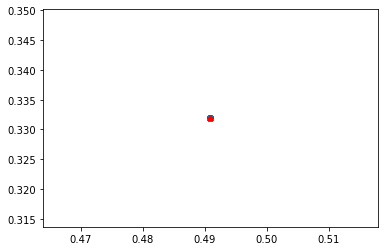

leader <__main__.Particle object at 0x000002037A05CA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2E50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CD00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2BB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EA60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B32E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3B80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B37C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C24C0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EAC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CE50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C850>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B30A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EFA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E3D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E3D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EF730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

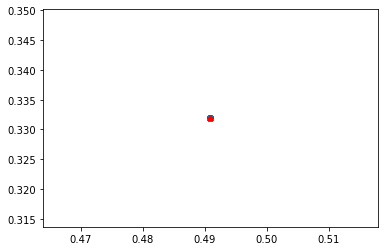

leader <__main__.Particle object at 0x000002037A05C220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03ED30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CE20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C160>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EEE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CAF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CBB0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDF0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3280>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B37C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C190>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B37C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

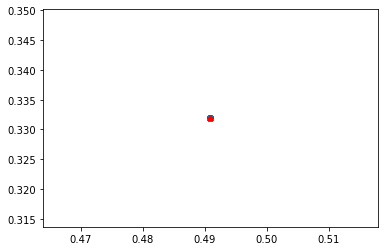

leader <__main__.Particle object at 0x000002037A03EC10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C910>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B36D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EEE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E850>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CA90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C0A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2760>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2B50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B36D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF10>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E160>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E700>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E8E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EE80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

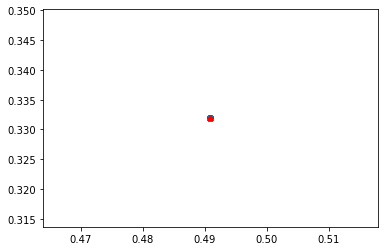

leader <__main__.Particle object at 0x000002037A03EE20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C24C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EE50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E490>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB20>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EBB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E340>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C27F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EC70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EDC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C24C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CE50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EB80>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E970>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C0D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EBB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EC70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572


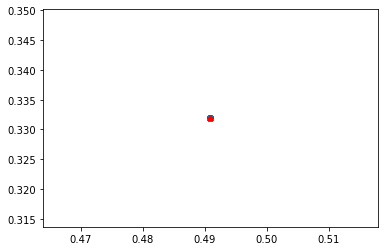

leader <__main__.Particle object at 0x000002037A03E280>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C400>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EF730>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3CA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B31C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E340>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E070>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E220>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CA00>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2AC0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EAF0>
Particles[i].best_position [0, 

0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E5B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFC40>
Particles[i].best_position [0, 1, 2, 3, 4] type

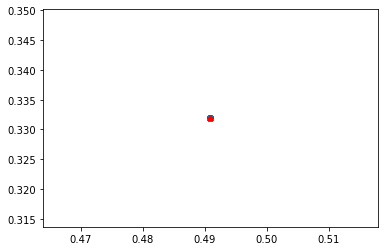

leader <__main__.Particle object at 0x00000203794B36D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203793EFA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CD30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E4C0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EEB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF520>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CC70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E760>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E040>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E7F0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3A90>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C760>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C790>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C820>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EF70>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CD30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C190>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CA30>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E280>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EFA0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3F40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

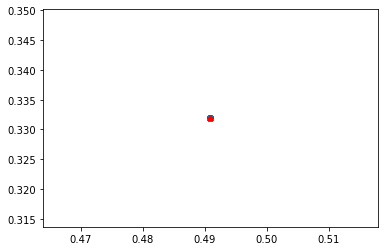

leader <__main__.Particle object at 0x00000203794C2B50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C22E0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.916666666

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C250>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CFBE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A0CF6A0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E0D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CF40>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EEB0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2670>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E280>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E9A0>
Particles[i].best_position [0, 1, 2, 3, 4] type

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2D60>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E880>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05C580>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03EC10>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B38B0>
Particles[i].best_position [0, 

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B36D0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A03E8B0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CFD0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3370>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3610>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CE50>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794B3640>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x000002037A05CEE0>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
maxIjogbon 0.490886818
cont_distance 0.331890241
C2 0.2983013755999999
end_valmod 0.9166666666666666
sum 0.17348246271428572
leader <__main__.Particle object at 0x00000203794C2550>
Particles[i].best_position [0, 1, 2, 3, 4] type <class 'list'>
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983

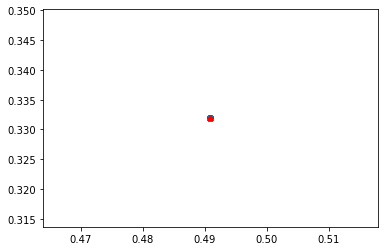

In [50]:
# MOPSO main loop
for it in range(maxIt):
    for i in range(nPop):
        leader = SelectLeader(Repos,beta)
        print ("leader", leader)
        # update velocity
        print ("Particles[i].best_position", Particles[i].best_position, "type", 
               type(Particles[i].best_position))
        #leader.position = np.array(leader)
        leaderpos_1 = leader.position

        #print ("Repos", Repos, "type", type(Repos))
        #print ("beta", beta, "type", type(beta))
        #print ("Particles[i].velocity", Particles[i].velocity, "type", type(Particles[i].velocity))
        
       # Particles[i].position = np.array(Particle[i].position)
        
        #print ("Particles[i].position", Particles[i].position, "type", 
         #      type(Particles[i].position))
        #print ("leader.position", leader.position, "type", 
          #     type(leader.position))
        
        positions = zip(Particles[i].best_position, Particles[i].position)
        position_diff = [x - y for (x, y) in positions]
        
        leaders = zip(leaderpos_1, Particles[i].position)
        leader_pos = [x - y for (x, y) in leaders]
        
        Particles[i].velocity = w*Particles[i].velocity  \
            + c1*np.random.rand(1,nVar)[0]*(position_diff) \
            + c2*np.random.rand(1,nVar)[0]*(leader_pos)
        
       
              
        # update position
        Particles[i].position = Particles[i].position + Particles[i].velocity 

        # evaluation
        tp = fixer(Particles[i].position)
        Particles[i].position = tp
        Particles[i].cost = MOCPParticle(Particles[i].position)
        

        if Dominates(Particles[i].cost,Particles[i].best_cost):
            Particles[i].best_position = Particles[i].position
            Particles[i].best_cost = Particles[i].cost
        else:
            if np.random.rand() > 0.5:
                Particles[i].best_position = Particles[i].position
                Particles[i].best_cost = Particles[i].cost
      
   
    Repos = Repos + Particles
    Repos = DetermineDomination(Repos)
    Repos = [item for item in Repos if item.IsDominated == False ]

    grid = CreateGrid(Repos,NoGrid,alpha=0.1,nobj=nObj)
    for r in range(len(Repos)):
        Repos[r] = FindGridIndex(Repos[r],grid)

    # check if repository is full
    if len(Repos) > nRep :
        extra = len(Repos) - nRep
        for e in range(extra):
            Repos = deleteOneRepositoryMember(Repos,gamma)

    ########## show figure ########## 
    plt.clf()
    particlesCost = np.reshape( [item.cost for item in Particles ],newshape=(nPop,5))
    repositoryCost = [item.cost for item in Repos]
    repositoryCost = np.reshape( repositoryCost, newshape=(len(repositoryCost),5))
    plt.plot(particlesCost[:,0], particlesCost[:,1], 'o' ,mfc='none')
    plt.plot(repositoryCost[:,0], repositoryCost[:,1], 'r*')
    
    plt.draw()
    plt.pause(0.00000000001)

    w=w*wdamping
    
    # print(repositoryCost)
    # print("ok")
    # print(particlesCost)
    ########## show figure ##########
plt.show()